# **Telecom customer churn prediction**

## 1. Understanding of data

## 2. EDA

## 3. Logistic regression

## 4. Decision tree & KNN classifier 

## 5. Random forest

## 6. Conclusion

## 7. Customer life-time value prediction

## Import necessary packages

In [0]:
import warnings 
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from scipy import stats
from pylab import rcParams
from matplotlib.pyplot import MultipleLocator

rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from patsy import dmatrices
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree, metrics
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
import pydotplus
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, f1_score, auc, confusion_matrix
import time
from sklearn.metrics import roc_auc_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import graphviz
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge, RidgeClassifier
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Introduction 

Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. 

Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. 

The main contribution of my work is to use machine learning techniques to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn.


## Description of dataset

This IBM Sample Dataset has information about Telco customers and if they left the company within the last month (churn). 

Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data.

I will predict customer behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.


# **Part 1 - Understanding of data**

##This data set includes information about:

1. Customers who left within the last month – the column is "Churn".

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

4. Demographic info about customers – gender, age range, and if they have partners and dependents.

## Load data

In [4]:
# Read data from Google Sheet
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTg1_OyEtAuuEuRAPN-ls2sIx2qYsdMF17zJrR9Via9WFw6QGTOOBKrgzYO3MSGD1-yr-94iTzQeFI7/pub?gid=1084193037&single=true&output=csv"
telco_df = pd.read_csv(data_path)
telco_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
list(telco_df)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

## Data Dictionary

- customerID : Customer ID  

- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)  

- Partner : Whether the customer has a partner or not (Yes, No)  

- Dependents : Whether the customer has dependents or not (Yes, No)  

- tenure : Number of months the customer has stayed with the company  

- PhoneService : Whether the customer has a phone service or not (Yes, No)   

- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service) 

- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)  

- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)  

- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)  

- DeviceProtection : Whether the customer has device protection or not (Yes, No,No internet service)  

- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)  

- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)  

- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)  

- Contract : The contract term of the customer (Month-to-month, One year, Two year)  

- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)  

- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  

- MonthlyCharges : The amount charged to the customer monthly  

- TotalCharges : The total amount charged to the customer  

- Churn : Whether the customer churned or not (Yes or No)  

In [0]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [0]:
telco_df.shape

(7043, 21)

The data contains 7,043 customers and 21 features. Customer ID is unique for every customer and acts as primary key.

In [0]:
telco_df['SeniorCitizen'] = telco_df.SeniorCitizen.astype('object')

## Data Cleaning

In [7]:
# Counts all missing values and its percentage.
total = telco_df.isnull().sum().sort_values(ascending = False)
frames = [total]
# pd.concat(): axis=0 means index, axis=1 means column, keys = name of the column.
missing_data = pd.concat(frames, axis = 1, keys = ['Total'])
missing_data.head()

,Total
TotalCharges,11
Churn,0
OnlineSecurity,0
gender,0
SeniorCitizen,0


There are only 11 missing values, all of them for the TotalCharges column. 

This values are actually a blank space in the csv file and are exclusive for customers with zero tenure. 

It's possible to concluded that they are missing due to the fact that the customer never paid anything to the company. 

I will impute this missing values with zero:

In [8]:
telco_df[telco_df['TotalCharges'] == " "].Churn

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: Churn, dtype: object)

In [0]:
telco_df['TotalCharges'] = telco_df["TotalCharges"].replace(" ", 0).astype('float32')

Approach 2 - we will fill them with the result of multiplying the tenure and MonthlyCharges columns. Since the first represents the number of months that the customer was in the company, and the second indicates the amount paid per month.

In [0]:
telco_df.TotalCharges.fillna(value = telco_df.tenure *  telco_df.MonthlyCharges, inplace = True)

# **Part 2 - EDA**

## Analysis of target variable


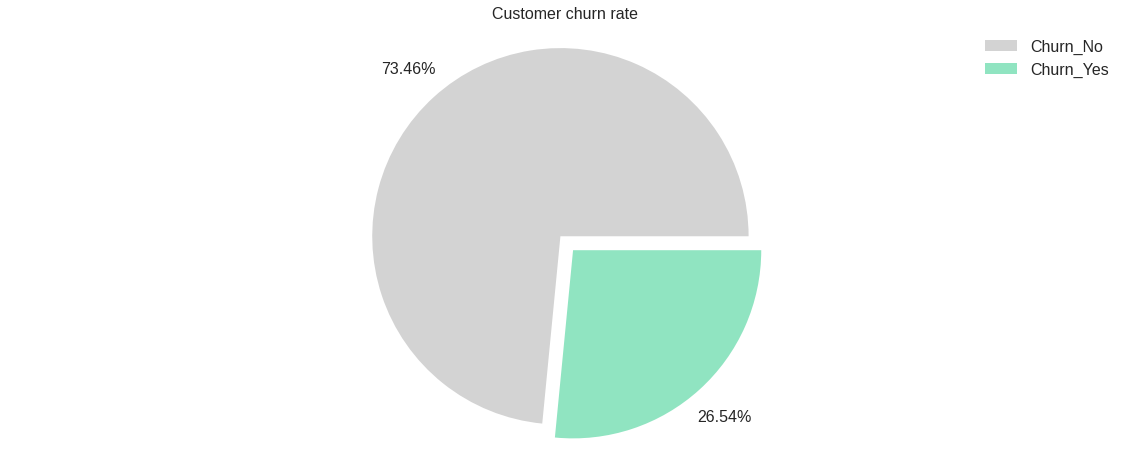

In [16]:
rcParams['figure.figsize'] = (20, 8)

# Count unique values in 'Churn'.
count = telco_df['Churn']
# Compute the percentage of unique values in 'Churn'.
percent = (telco_df['Churn'].value_counts() / telco_df['Churn'].count() *100).round(2)

# Create a summary dataframe
frames = [count, percent]
churn_agg = pd.concat(frames, axis=1, keys = ['Count', 'Percent'])
churn_agg

fig, ax = plt.subplots()

# set font size. 
plt.rcParams['font.size']=16

# set color palette.
color_palette_list = ['lightgrey', '#90e4c1']

# make a pie chart. 
percentages = percent.values.tolist()
explode=(0.1, 0)
labels = ['Churn_No', 'Churn_Yes']
ax.pie(percentages, colors = color_palette_list[0:2], autopct = '%1.2f%%', explode=explode, shadow = False, startangle = 0, pctdistance = 1.2, labeldistance = 1.4)
ax.axis('equal')
ax.set_title('Customer churn rate', fontsize = 16)
ax.legend(labels)

We are dealing with imbalanced dataset, with only 26.54% of churn rate.

## Handling categorical variables
This dataset has 16 categorical features:
- 6 binary features (Yes/No)
- 9 features with 3 unique values each (category)
- 1 feature with four unique values
* We will get all categorical features and see their distribution by the target
* We will calculate the churn rate for each value in categories

In [12]:
cat_telco = telco_df.select_dtypes(include = 'object').copy()
cat_telco = cat_telco.drop(columns='customerID')
cat_telco.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [13]:
cat_telco.describe(include = 'object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


- Most customers are not Senior;
- The most popular internet service is fiber optics;
- Most customers prefer not to receive printed accounts;
- The most popular form of payment is the electronic payment

### Gender and Age (SeniorCitizen)

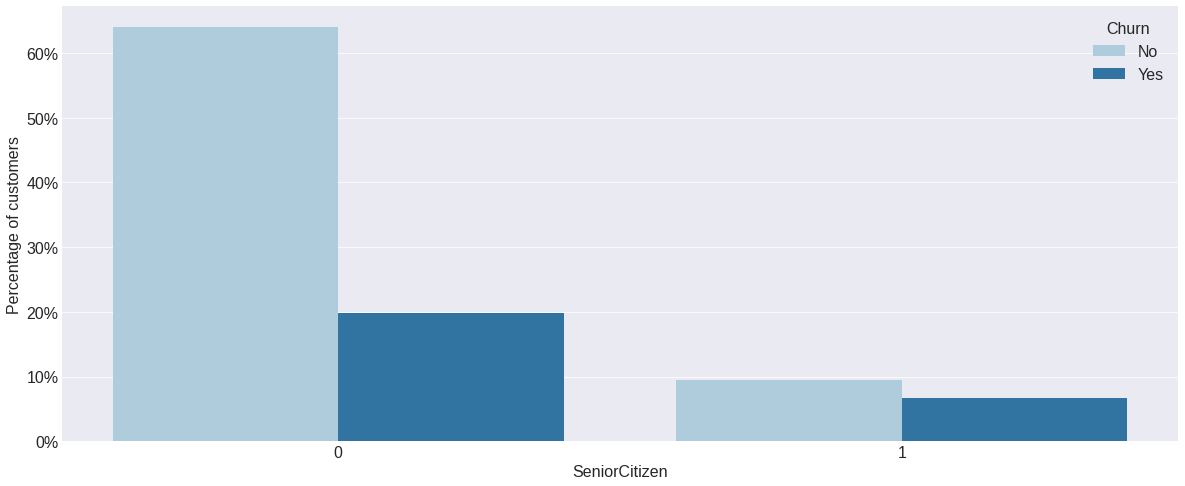

In [17]:
def barplot_percentages(feature, orient='v', axis_name="Percentage of customers"):
    ratios = pd.DataFrame()
    g = telco_df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(telco_df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient, palette = sns.color_palette('Paired'))
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient, palette = sns.color_palette('Paired'))
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

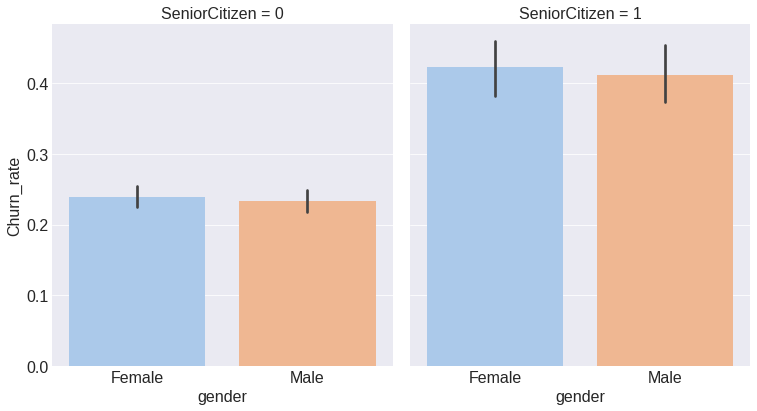

In [29]:
telco_df['Churn_rate'] = telco_df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(telco_df, col = "SeniorCitizen", height = 6, aspect = .9)
ax = g.map(sns.barplot, "gender", "Churn_rate", palette = "pastel", order= ['Female', 'Male'])

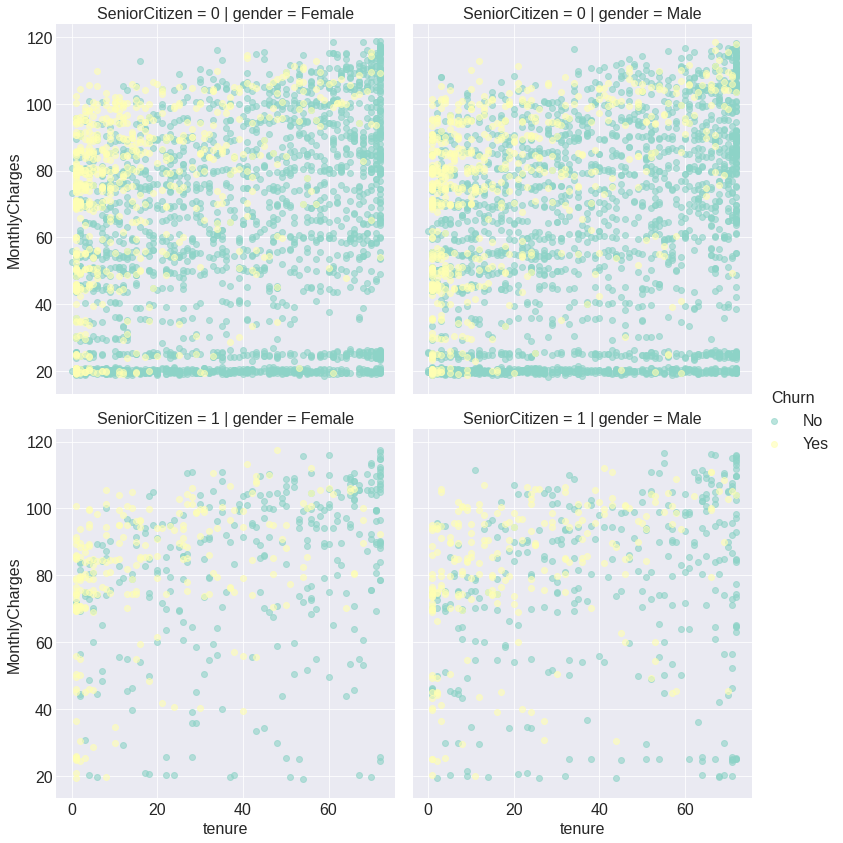

In [26]:
g = sns.FacetGrid(telco_df, row = 'SeniorCitizen', col = "gender", hue="Churn", height = 6, aspect = .9, palette = "Set3")
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha = 0.6)
g.add_legend();

- Gender is not an indicative of churn.
- SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
- There are no special relations between this categorical values and the main numerical features.

### Contract and Payment

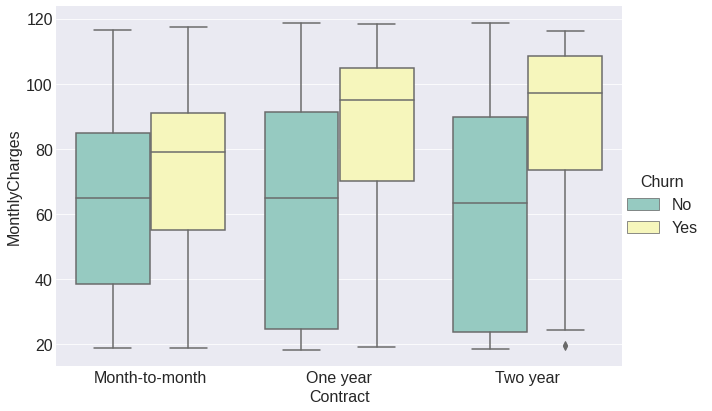

In [44]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=telco_df, height = 6, aspect=1.5, palette = "Set3")

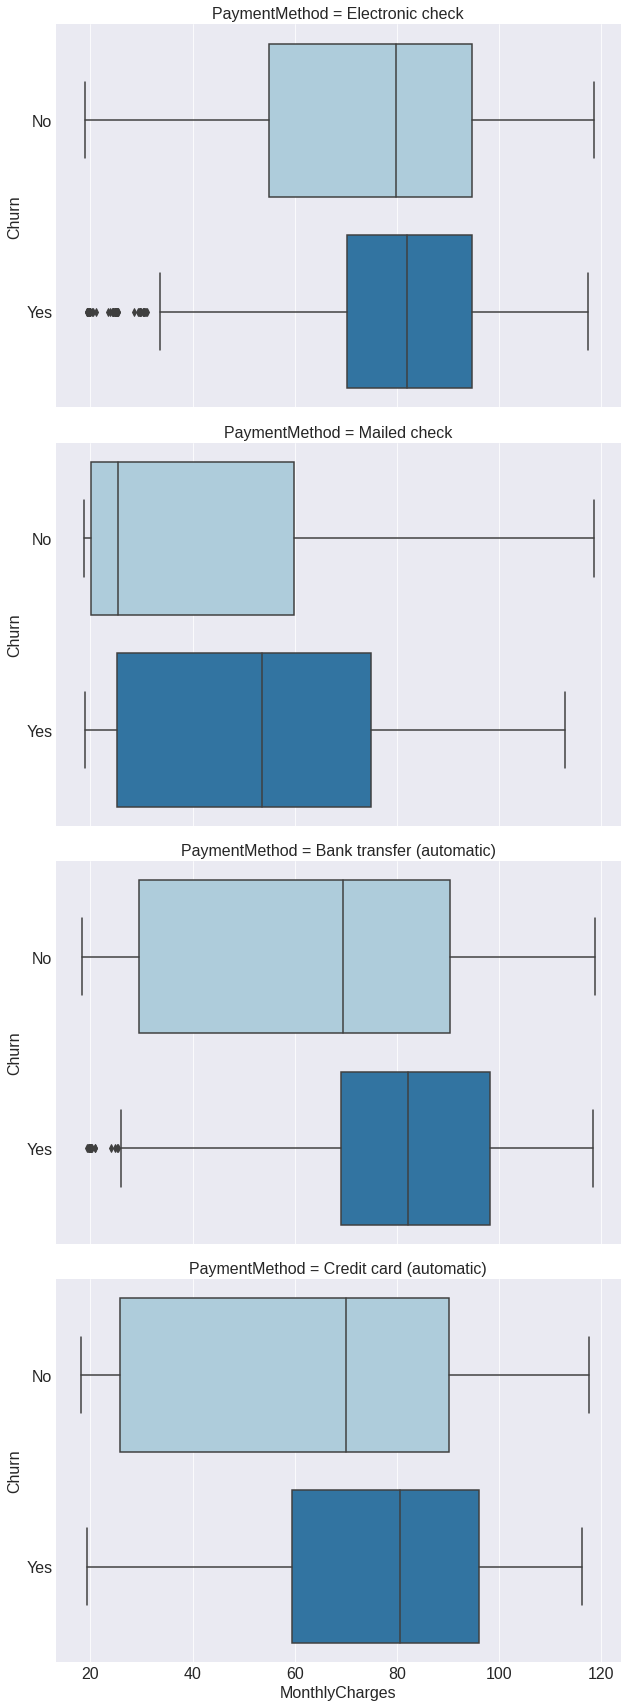

In [42]:
ax = sns.catplot(y = "Churn", x = "MonthlyCharges", row = "PaymentMethod", kind = "box", data=telco_df, height=6, aspect=1.5, orient='h', palette = "Paired")

- Longer contracts are more affected by higher monthly charges (for churn rate).
- Mailed checks have lower charges
- There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check

## Numerical Variables


In [45]:
telco_df.describe().round()

,tenure,MonthlyCharges,TotalCharges,churn_rate,Churn_rate
count,7043.0,7043.0,7043.0,7043.0,7043.0
mean,32.0,65.0,2280.0,0.0,0.0
std,25.0,30.0,2267.0,0.0,0.0
min,0.0,18.0,0.0,0.0,0.0
25%,9.0,36.0,399.0,0.0,0.0
50%,29.0,70.0,1395.0,0.0,0.0
75%,55.0,90.0,3787.0,1.0,1.0
max,72.0,119.0,8685.0,1.0,1.0


- Half of the clients remain in the company for more than 29 months (just over two years);
- The average amount per month $ 30;
- The average total revenue generated per customer is 2280.

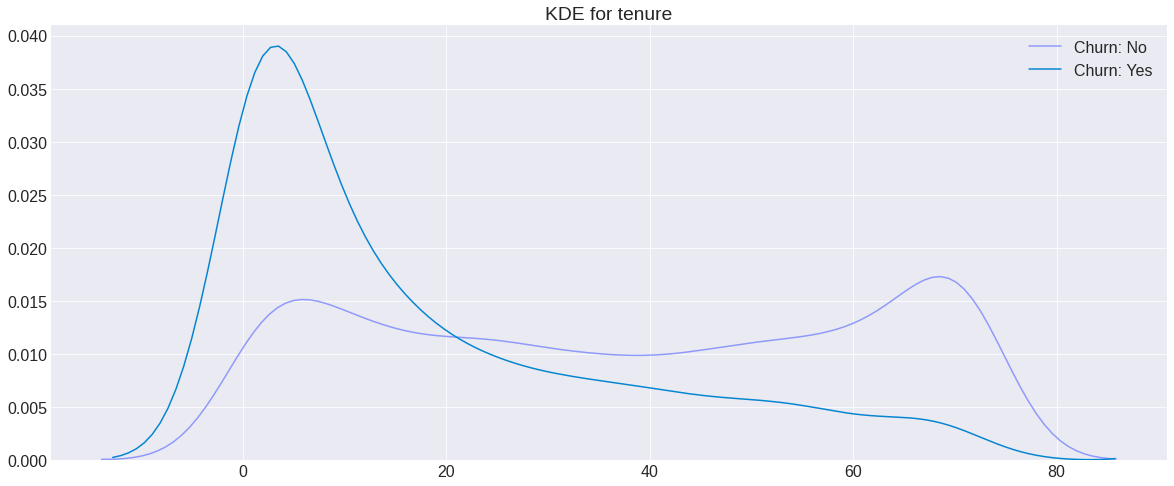

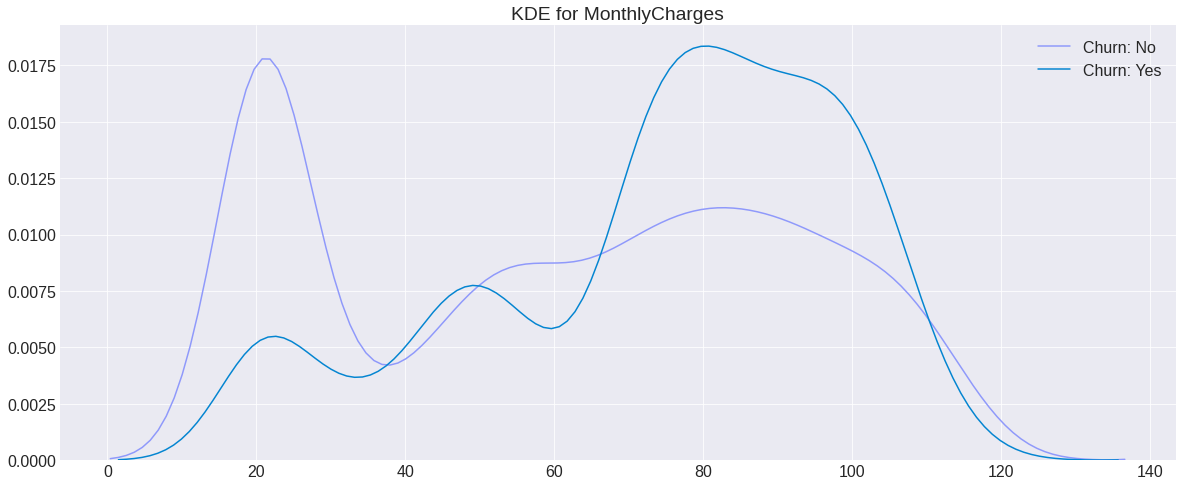

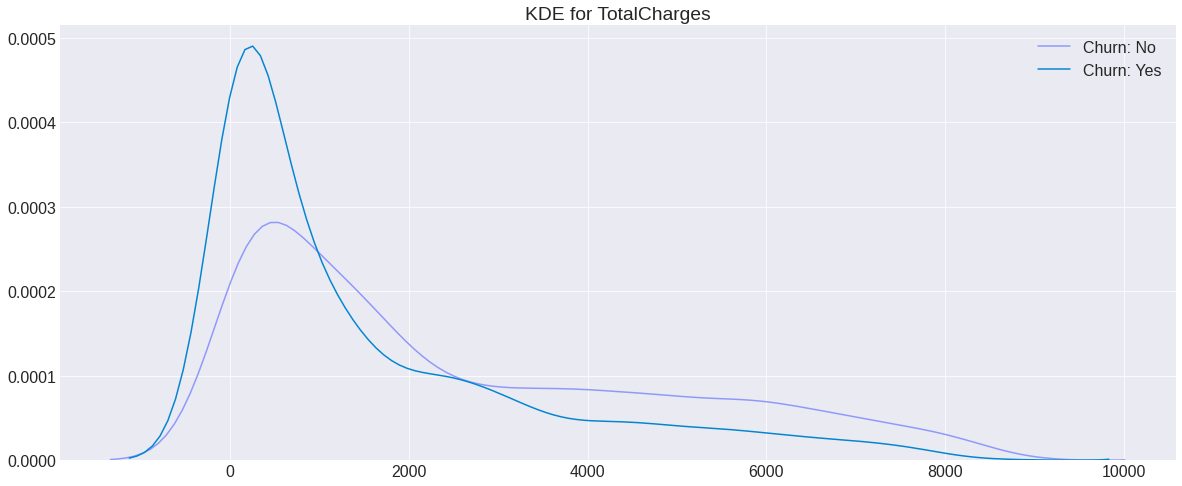

In [66]:
def kdeplot(feature):
    plt.figure(figsize=(20, 8))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telco_df[telco_df['Churn'] == 'No'][feature].dropna(), color = '#8f99fb', label= 'Churn: No')
    ax1 = sns.kdeplot(telco_df[telco_df['Churn'] == 'Yes'][feature].dropna(), color = '#0485d1', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

- Recent clients are more likely to churn
- Clients with higher MonthlyCharges are also more likely to churn
- Tenure and MonthlyCharges are probably important features

(0.0, 10465.738699811818)

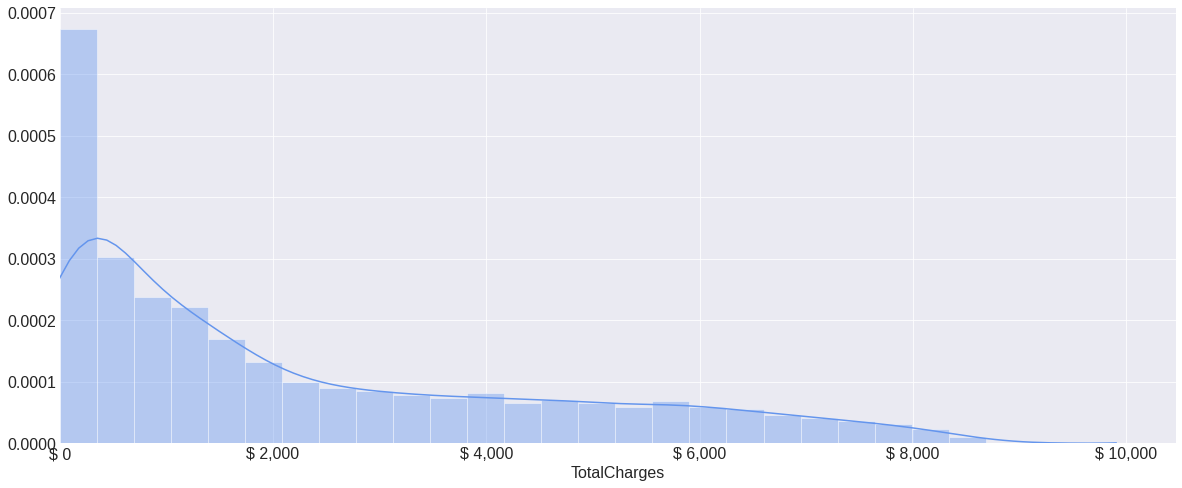

In [56]:
ax = sns.distplot(telco_df['TotalCharges'], color = 'cornflowerblue')

# Set x tick. 
fmt = '$ {x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

# Set the range of x axis
plt.xlim(0, None)

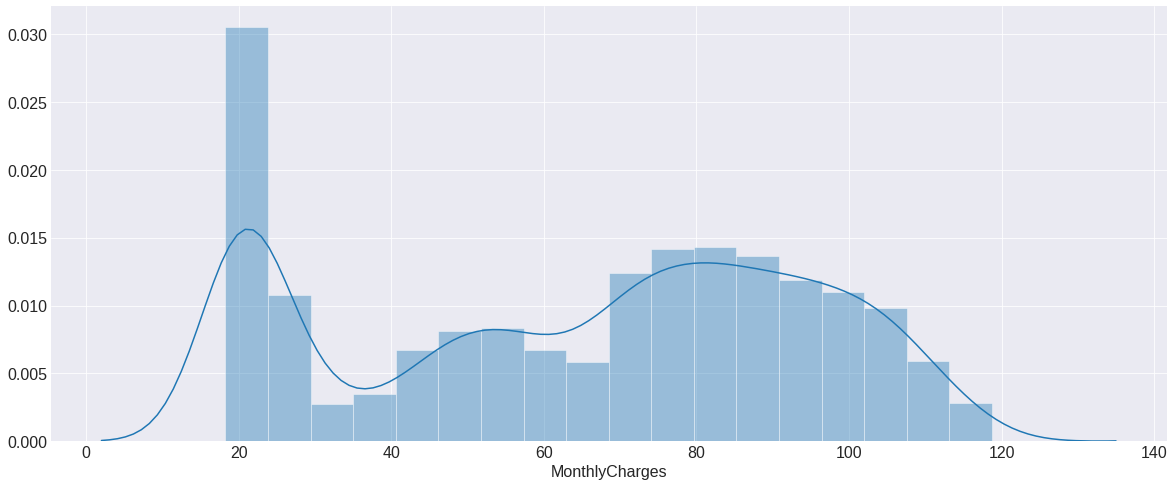

In [58]:
ax = sns.distplot(telco_df['MonthlyCharges'])

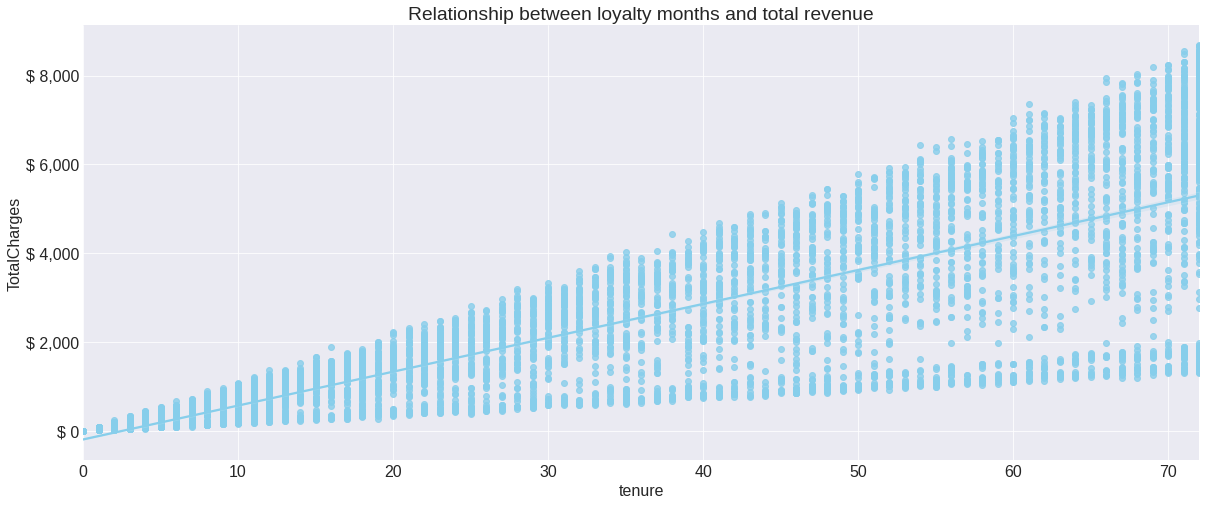

In [65]:
numerics = telco_df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']]

plt.figure(figsize = (20, 8))

ax = sns.regplot(x = 'tenure', y = 'TotalCharges', data = numerics, color = 'skyblue')

plt.title('Relationship between loyalty months and total revenue')

# Set y tick. 
fmt = '$ {x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

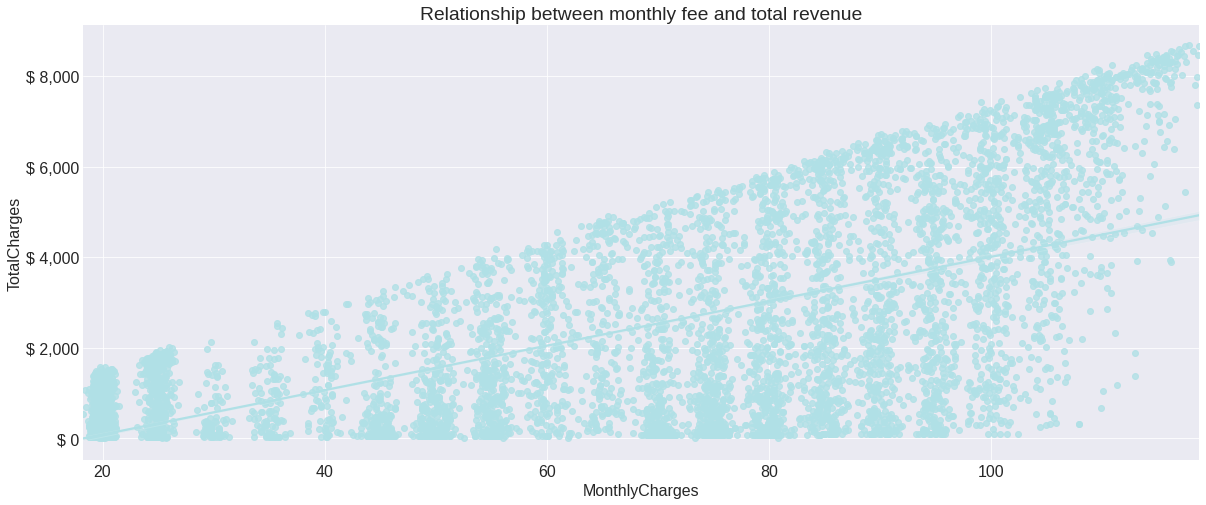

In [69]:
plt.figure(figsize = (20, 8))
plt.title('Relationship between monthly fee and total revenue')
ax = sns.regplot(x = 'MonthlyCharges', y = 'TotalCharges', data = numerics, color = 'powderblue')

# Set y tick. 
fmt = '$ {x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

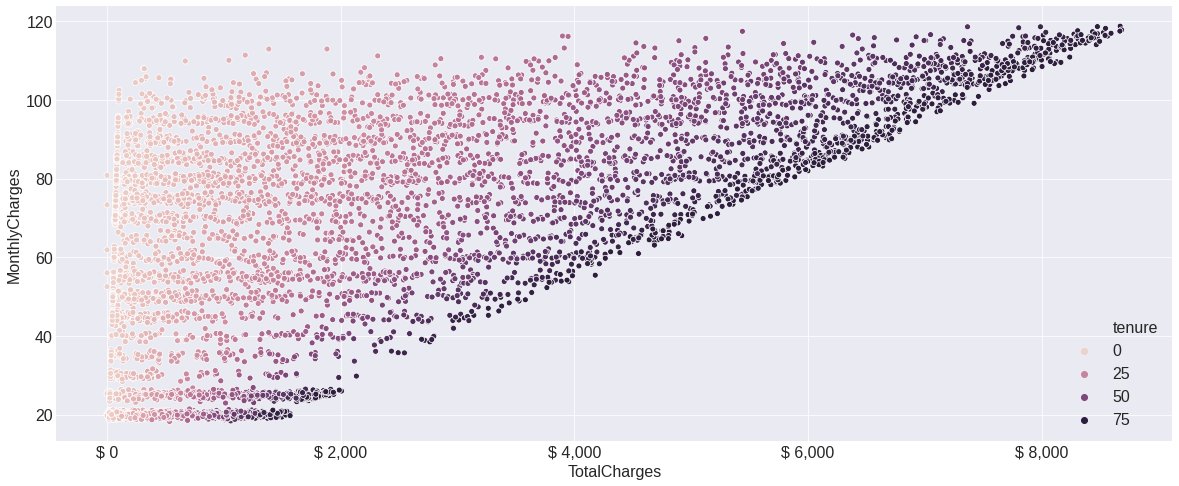

In [70]:
ax = sns.scatterplot(x="TotalCharges", y="MonthlyCharges", hue="tenure", data=telco_df)

# Set x tick. 
fmt = '$ {x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

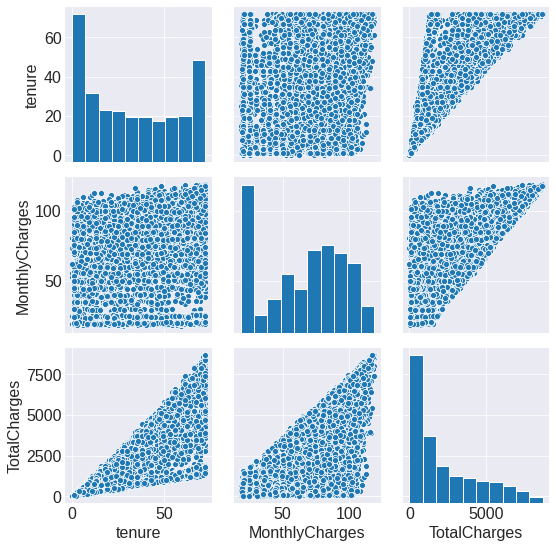

In [78]:
rcParams['figure.figsize'] = (20, 8)
ax = sns.pairplot(numerics, palette = 'Set3')

## Correlation between features

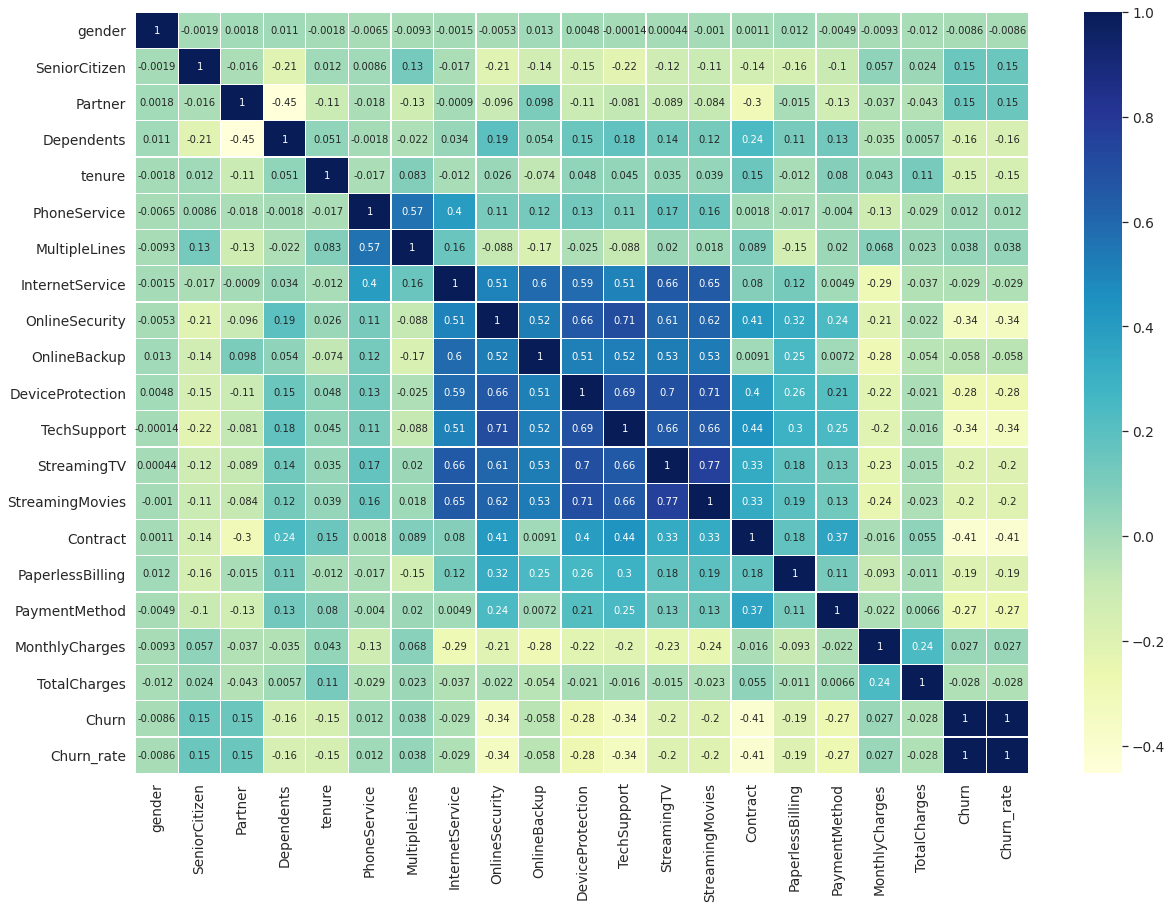

In [84]:
plt.figure(figsize=(20, 14))

telco_df.drop(['customerID', 'churn_rate'], axis=1, inplace=True)

corr = telco_df.apply(lambda x: pd.factorize(x)[0]).corr('spearman')

ax = sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
                 linewidths = .2, cmap = "YlGnBu", annot = True, annot_kws = {'size':10})

sns.set(font_scale = 1.25)

From above basic EDA, we can conclude that as a first step we can start building our base model taking 'MonthlyCharges' as a good feature to start with. 


# **Data preprocessing for models development**

## Load data

In [0]:
# Read data from Google Sheet
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTg1_OyEtAuuEuRAPN-ls2sIx2qYsdMF17zJrR9Via9WFw6QGTOOBKrgzYO3MSGD1-yr-94iTzQeFI7/pub?gid=1084193037&single=true&output=csv"
telco_df = pd.read_csv(data_path)
telco_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Check the null data

In [0]:
# Drop null data of TotalCharges
telco_df.dropna(axis = 0, inplace = True)

# Check the number of missing values.
telco_df.isnull().sum().max()

0

In [0]:
telco_df_dummies = pd.get_dummies(telco_df.iloc[:,1:])
telco_df_dummies_clean = telco_df_dummies.drop(['Churn_No'],axis=1)
telco_df_dummies_clean.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1


In [0]:
col_name = telco_df_dummies_clean.columns.to_list()
col_name.remove('Churn_Yes')
col_name = [ x for x in col_name if "No" not in x ]
col_name

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [0]:
# standardized the different columns (covert to same scale)
x = telco_df_dummies_clean[col_name]
scaler = preprocessing.StandardScaler().fit(x)
x = pd.DataFrame(scaler.transform(x))

# **Part 3 - Logistic regression**

## Ridge Regression (logistic regression with l1 regularization)

We first applied ridge regression model to get the accuracy score, which is 0.804.

In [0]:
# Apply Ridge regression
y = telco_df_dummies_clean ['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
ridgereg = RidgeClassifier(random_state=10)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
ridgereg.score(X_test, y_test)

0.8038379530916845

In [0]:
# Regression Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8038379530916845
Precision Score : 0.6678700361010831
Recall Score : 0.5013550135501355
F1 Score : 0.5727554179566563


## Lasso Regression (logistic regression with l2 regularization)

In order to do the comparasion, we also applied lasso regression. Noted that the penalty is set on l2 as the default and the parameter C is 1 as the default (lasso regression).

In [0]:
# Train and test sets: 80% and 20% 
y = telco_df_dummies_clean['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [0]:
#Initialize Logistic Regressor 
model = LogisticRegression(random_state= 10)

#Fit the model
model.fit(X_train, y_train)

#Let's score the model
model.score(X_test, y_test)

0.8073916133617626

In [0]:
#Get predictions for the test set
y_pred = model.predict(X_test)

In [0]:
# Regression Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8073916133617626
Precision Score : 0.6388888888888888
Recall Score : 0.5734072022160664
F1 Score : 0.6043795620437955


We can see that the accuracy score is 0.807, which is higher than ridge regression model.




## Select key features

In [0]:
correlation_df = pd.DataFrame(telco_df_dummies_clean[col_name+['Churn_Yes']].corr()['Churn_Yes'].abs().sort_values(ascending = False)).reset_index()
col = ['Variables', 'Correlations']
correlation_df.columns = col
correlation_df['Variables'] = correlation_df.where(correlation_df.Correlations > 0.1)
correlation_df.dropna().Variables.to_list()

['Churn_Yes',
 'Contract_Month-to-month',
 'tenure',
 'InternetService_Fiber optic',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'TotalCharges',
 'MonthlyCharges',
 'PaperlessBilling_Yes',
 'Contract_One year',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'Dependents_Yes',
 'SeniorCitizen',
 'Partner_Yes',
 'PaymentMethod_Credit card (automatic)',
 'InternetService_DSL',
 'PaymentMethod_Bank transfer (automatic)']

<Figure size 1656x576 with 0 Axes>

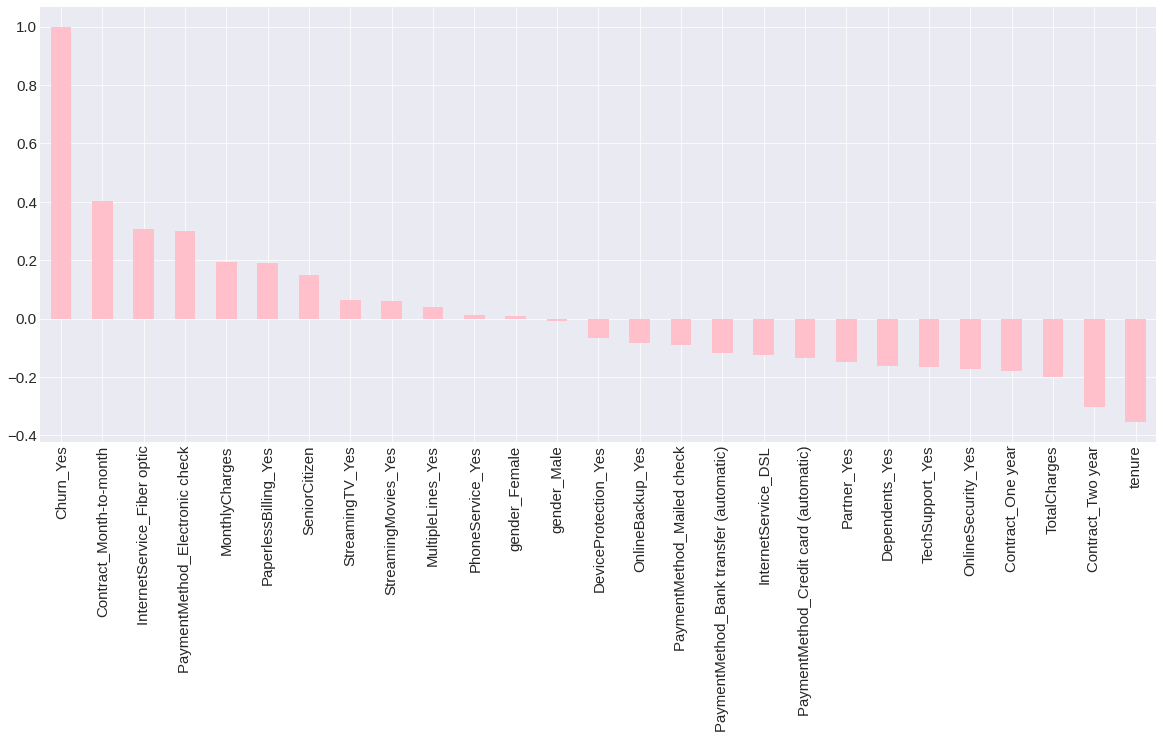

<Figure size 1656x576 with 0 Axes>

In [0]:
fig = telco_df_dummies_clean[col_name+['Churn_Yes']].corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar',color = 'pink',fontsize = 15)
plt.figure(figsize=(23, 8))

## Using Gridsearch for Lasso Regression (Exhaustive search over specified parameter values for an estimator）

In order to improve the lasso model above, we applied grid search method to enhance specified parameters. The first step needed to consider is what key features needed to put into our model. After several attempts, we decided to put all features into the model to get the highest final accuracy score. The accuracy score is 0.812 and the F1 score is higher than the previous models.

In [0]:
# dataframe that includes all variables except 'gender_Female' & 'Churn_Yes'
input_values_df = telco_df_dummies_clean
x2 = input_values_df[['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']]
scaler = preprocessing.StandardScaler().fit(x2)
x2 = pd.DataFrame(scaler.transform(x2))
y2 = input_values_df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=10)

clf = LogisticRegression(random_state=10)
grid_values = {'penalty': ['l2'],
               'C':[1,10,100,1000,10000],
               'max_iter':[1000000]}
# using 5 folds cross validation
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, cv = 5 , verbose = 0, scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.8116560056858564
Precision Score : 0.647239263803681
Recall Score : 0.5844875346260388
F1 Score : 0.6142649199417759


In [0]:
# get the best parameters
grid_clf_acc.best_params_

{'C': 1000, 'max_iter': 1000000, 'penalty': 'l2'}

## Confusion Matrix for the lasso regression

Since the lasso regression model with grid search method is the best performance model, so we decided to analyze the confusion matrix. Noticed that there are 931 cases are true negative results and 211 are true positive results. However, there are 115 are false positive results (those customers are not leaving the telco company, but the model predicted that they are leaving. 150 of customers should be leaving, but the model thought that they are not. Telco comapny may need to decide which error (type I or type II error) they want to minimize depending on the company's strategy. 

The cost for false positive is that the company is spending campaign fees for the customers who are not leaving the company. That is waste of money. The cost of false negative is that the company will lose customers. We can compare the cost of campaign and the cost of losing customers. 

Since we don't know the campaign fees in this dataset, we are not going to analyze this part. However, we can do the prediction on customer life-time value to know what the customer value for the company for each customer based on their tenure and total monthly charges. We will focus on this part in part 7.



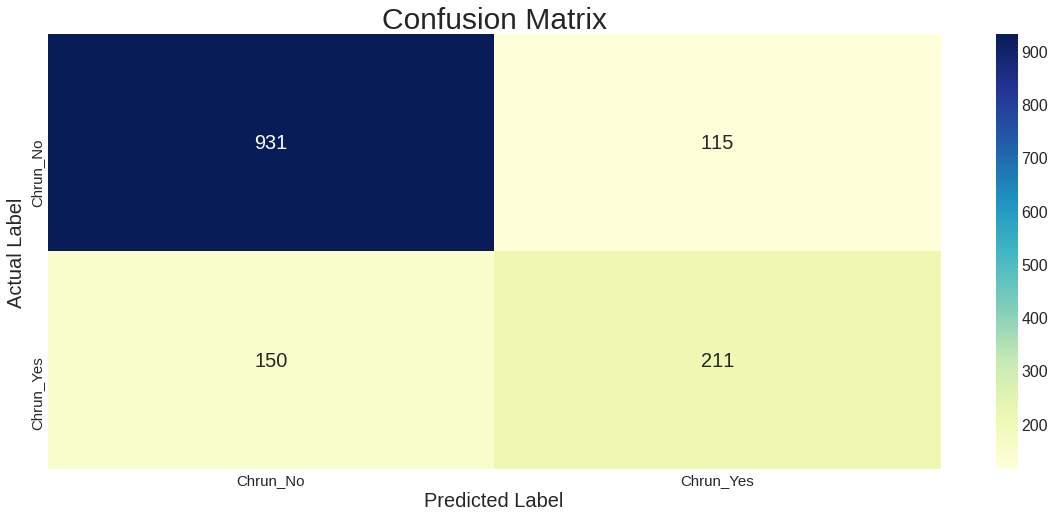

In [0]:
fig = sns.heatmap(confusion_matrix(y_test, y_pred_acc),annot=True,fmt="d",cmap="YlGnBu", annot_kws={"size": 20})
fig.set_xlabel('Predicted Label', fontsize = 20)
fig.set_ylabel('Actual Label', fontsize = 20)
fig.set_title('Confusion Matrix', fontsize = 30)
fig.set_xticklabels(['Chrun_No', 'Chrun_Yes'],fontsize = 15)
fig.set_yticklabels(['Chrun_No', 'Chrun_Yes'], fontsize = 15)

# Set the figure size. 
rcParams['figure.figsize'] = (20, 8)

## ROC Curve for the lasso regression

Since this is the two-class prediction problem, we applied ROC curve for the best performance model. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The best possible prediction method would yield a point in the upper left corner. We can interpret that the graph here is a good model. Noticed that the accuracy score for ROC is 0.855, which is high.

Area under ROC curve is: 0.854978469621775


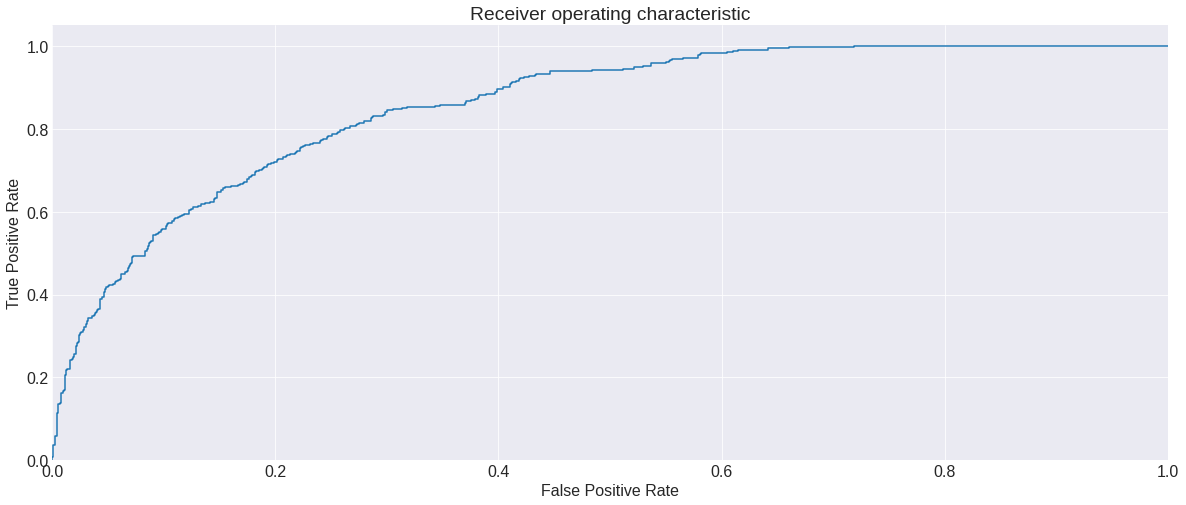

In [0]:
# Set the figure size. 
rcParams['figure.figsize'] = (20, 8)

y_pred_prob = grid_clf_acc.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:,1:])
    roc_auc[i] = auc(fpr[i], tpr[i])

print("Area under ROC curve is: " + str(roc_auc_score(y_test, y_pred_prob[:,1:])))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# **Part 4 - Decision tree**

#### Set up X and y

In [0]:
# Standardized the different columns (covert to same scale)
X = telco_df_dummies_clean[col_name]
scaler = preprocessing.StandardScaler().fit(X)

In [0]:
# Set X and y. 
X = pd.DataFrame(scaler.transform(X), columns = X.columns)
y = telco_df_dummies_clean['Churn_Yes']

# Train and test sets: 80% and 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

#### Decision Tree model development

In [0]:
dtree_model = DecisionTreeClassifier(max_depth=200, criterion='entropy', min_samples_leaf = 4, random_state = 10)
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=200, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

#### Find the score of the model

In [0]:
print('Decision Tree Training Data Accuracy: {:.3f}'.format(accuracy_score(y_train, dtree_model.predict(X_train))))

dtree_pred = dtree_model.predict(X_test)
print('Decision Tree Testing Data Accuracy: {:.2f}'.format(accuracy_score(y_test, dtree_pred)))
print('Decision Tree F1 Score : ' + str(f1_score(y_test,dtree_pred)))

Decision Tree Training Data Accuracy: 0.905
Decision Tree Testing Data Accuracy: 0.75
Decision Tree F1 Score : 0.5078014184397164


From the accuracy score above, we can find that training data accuracy is bigger than testing data accuracy, and the f1 score is low which means that the model may be overfitted

#### Using CV to find the better training data score

In [0]:
dtree_cv_scores = cross_val_score(dtree_model, X_train, y_train, cv=5)
print('Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n' % (dtree_cv_scores.mean(), dtree_cv_scores.std()))

Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: 0.74 and Standard Deviation: 0.01 



By using 5-folds cross validation method, we can get lower training data accuracy which is 0.74. Also, the standard deviation is close to zero. The model looks better!

#### Plot the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

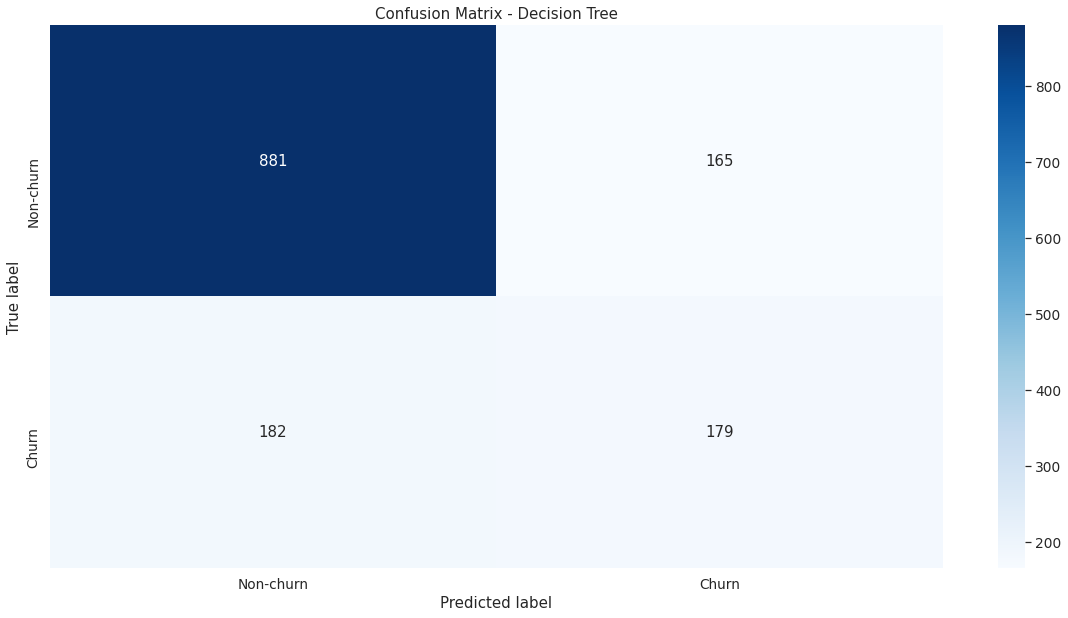

In [0]:
dtree_cm = confusion_matrix(y_test, dtree_pred)
print()

plt.figure(figsize=(20,10))
ConfMatrix = confusion_matrix(y_test, dtree_pred)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-churn', 'Churn'], 
            yticklabels = ['Non-churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree")

In [0]:
# Number of errors
error = 0
for i, v in enumerate(dtree_model.predict(X_test)):
  if v != y_test.values[i]:
    error += 1
print(error)

347


#### Performance

In [0]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1046
           1       0.52      0.50      0.51       361

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.75      0.75      0.75      1407



### Using the GridSearch to identify the best hyperparameters

To increase the accuracy score, let's use the GridSearch to identify the best hyperparameters

In [0]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(1, 500), 
              'min_samples_leaf': [5, 10, 20, 30, 40], 'max_leaf_nodes': [50, 100, 200, 300, 400]}

grid_dtree_acc = GridSearchCV(dtree_model, param_grid, cv = 3)
grid_dtree_acc.fit(X_train, y_train)

#Predict values based on new parameters
grid_tree_pred_acc = grid_dtree_acc.predict(X_test)

In [0]:
grid_dtree_acc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 5}

Based on the grid search above, we found that the best model parameter is

 {'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 5}

### Using the best hyperparameters to show the result

Train the model and find the accuracy score

In [0]:
# Train the decision tree model
dtree_model2 = DecisionTreeClassifier(criterion= 'gini',max_depth= 4, max_leaf_nodes= 50, min_samples_leaf =  5,random_state=10)
dtree_model2.fit(X_train, y_train)

# Show the score of training data set
print('Decision Tree Training Data Accuracy: {:.3f}'.format(accuracy_score(y_train, dtree_model2.predict(X_train))))

# Show the score of testing data set
dtree_pred2 = dtree_model2.predict(X_test)
print('Decision Tree Testing Data Accuracy: {:.2f}'.format(accuracy_score(y_test, dtree_pred)))
dtree_cv_scores2 = cross_val_score(dtree_model2, X_train, y_train, cv=5)
print('Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n' % (dtree_cv_scores2.mean(), dtree_cv_scores2.std()))


Decision Tree Training Data Accuracy: 0.794
Decision Tree Testing Data Accuracy: 0.75
Mean Decision Tree (entropy) CrossVal Train Set Accuracy Mean: 0.79 and Standard Deviation: 0.01 



From the outcome above, we can find that the training set accuracy mean is 0.79 and the standard deviation of 5-folds cross-validation train set is close to zero. The model seems good!

#### Plot the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

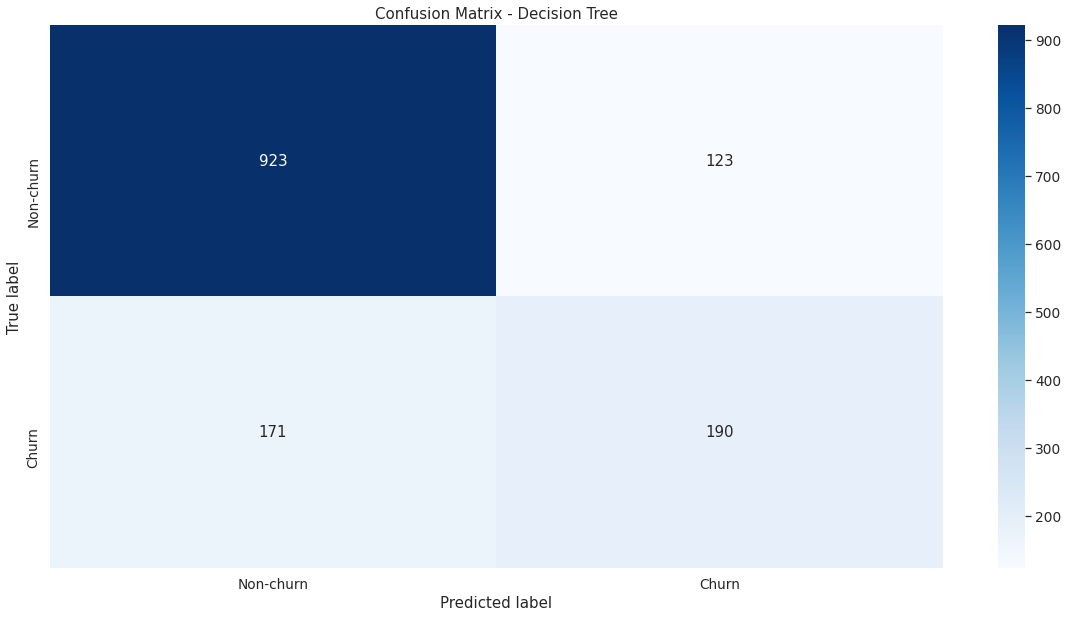

In [0]:
dtree_cm2 = confusion_matrix(y_test, dtree_pred2)
print()

plt.figure(figsize=(20,10))
ConfMatrix2 = confusion_matrix(y_test, dtree_pred2)
sns.heatmap(ConfMatrix2,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-churn', 'Churn'], 
            yticklabels = ['Non-churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree")

In [0]:
# Number of errors
error = 0
for i, v in enumerate(dtree_model2.predict(X_test)):
  if v != y_test.values[i]:
    error += 1
print(error)

294


We can found that the prediction number of errors decreased from 347 -> 294


#### Performance

In [0]:
print(classification_report(y_test, dtree_pred2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1046
           1       0.61      0.53      0.56       361

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



After using grid search, the model has a higher F1 score. Hence, the accuracy  of the prediction increase from 75% to 79%

### Visualize the decision tree

#### Plot the decision tree

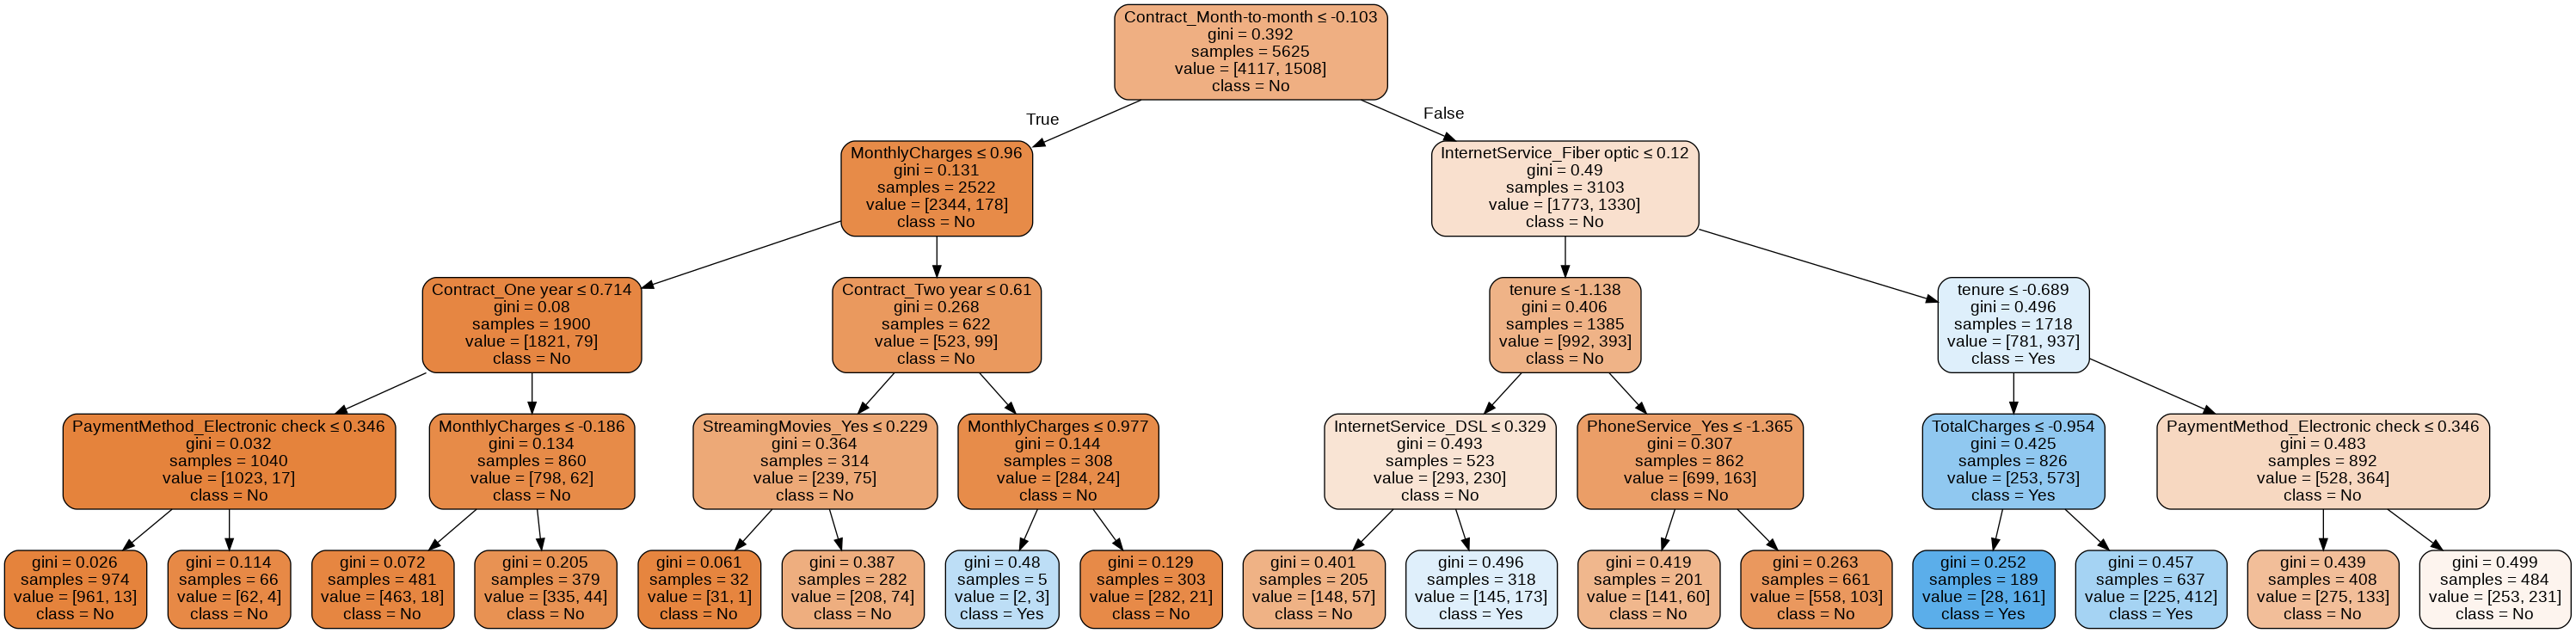

In [0]:
# Set the figure size. 
rcParams['figure.figsize'] = (20, 8)

dot_data = StringIO()
export_graphviz(dtree_model2, out_file = dot_data, feature_names=list(X),
                class_names=list(telco_df.iloc[1:,-1].unique()),
                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Find the coefficient

In [0]:
# Print the model's coefficient value, and make a ranking dataframe.  

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient'] = pd.Series(dtree_model2.feature_importances_)

coeff_df.sort_values(by = 'Coefficient', ascending = False).round(4)

,Features,Coefficient
18,Contract_Month-to-month,0.5474
1,tenure,0.1702
11,InternetService_Fiber optic,0.1611
2,MonthlyCharges,0.0282
10,InternetService_DSL,0.0271
3,TotalCharges,0.0188
24,PaymentMethod_Electronic check,0.0160
20,Contract_Two year,0.0124
8,PhoneService_Yes,0.0096
17,StreamingMovies_Yes,0.0047


From the visualization and the coefficient of decision tree, we can find that

1. Contract_Month-to-month has the highest coefficient

2. Coefficients for 15 features are 0.

### Plot the ROC curve

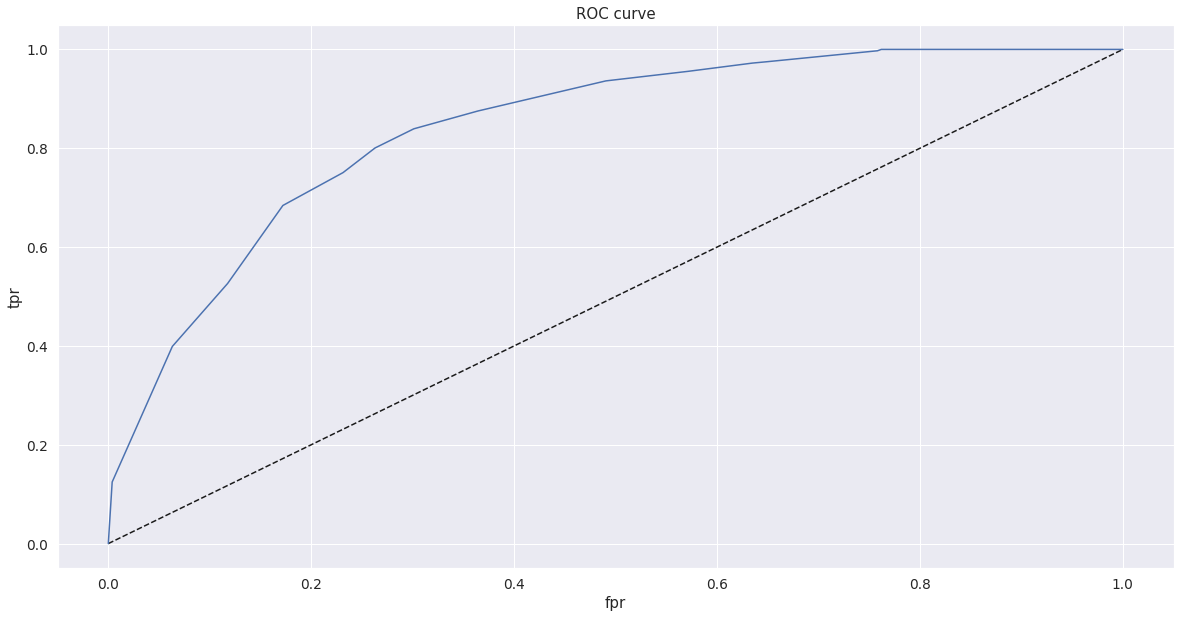

In [0]:
dtree_auc = roc_auc_score(y_test, dtree_model2.predict_proba(X_test)[:,1]).round(2)
dtree_fpr, dtree_tpr, dtree_thresholds = roc_curve(y_test, dtree_model2.predict_proba(X_test)[:, 1])

plt.figure(figsize=(20,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(dtree_fpr, dtree_tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

Score of ROC curve

In [0]:
roc_auc_score(y_test, dtree_model2.predict_proba(X_test)[:,1])

0.8417093478387525

The AUC score of decision tree is 84%

Let's see if we can get a better performance in KNN classifier

## KNN classifier

Train the KNN classifier model

In [0]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

Plot the testing and training accuracy of the model

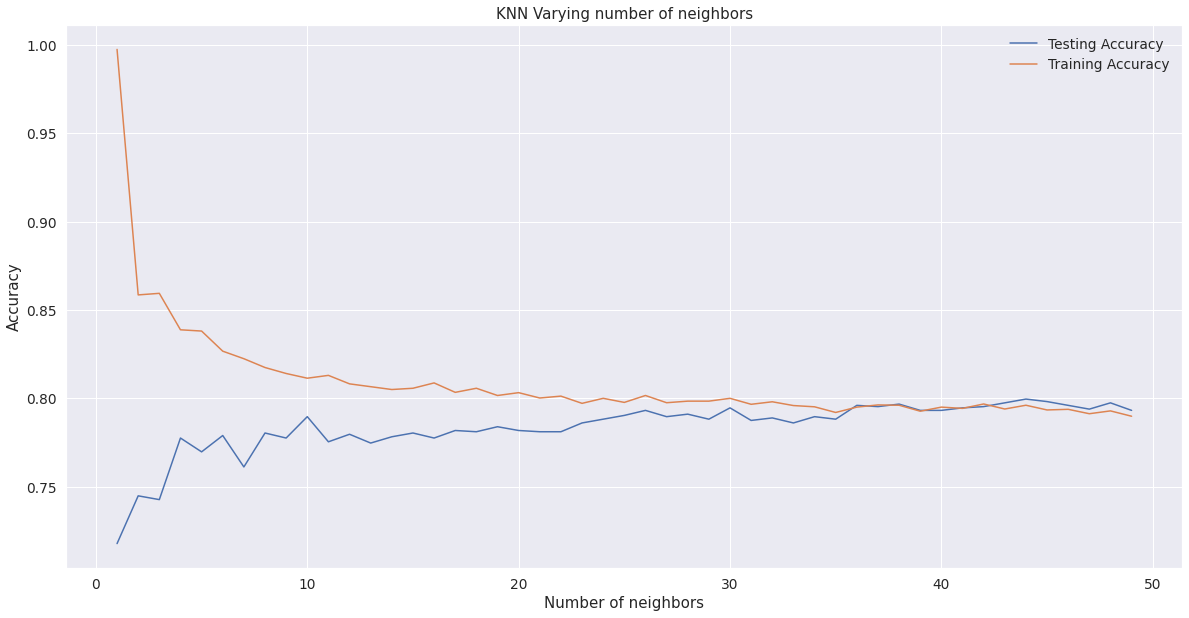

In [0]:
#Generate plot
plt.figure(figsize=(20,10))
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can find that the when the number of neighbors is between 35-40, we can have the similiar testing accuracy and training accuracy. I will use n_neighbors = 39 to train the model.

#### Using the best n_neighbors to show the result

In [0]:
#Based on the above
knn2 = KNeighborsClassifier(n_neighbors=39)

In [0]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

In [0]:
print('knn training score: ', knn2.score(X_train,y_train))
print('knn testing score: ', knn2.score(X_test,y_test))
knn_pred = knn2.predict(X_test)
print('knn F1 Score : ' + str(f1_score(y_test,knn_pred)))
knn_cv_scores = cross_val_score(knn2, X_train, y_train, cv=5)
print('knn CrossVal Train Set Accuracy Mean: %.2f and Standard Deviation: %.2f \n' % (knn_cv_scores.mean(), knn_cv_scores.std()))

knn training score:  0.7927111111111111
knn testing score:  0.7931769722814499
knn F1 Score : 0.5963938973647711
knn CrossVal Train Set Accuracy Mean: 0.78 and Standard Deviation: 0.01 



We can find that the score of training data and testing data is almost the same. The standard deviation of the 5-folds cross-validation train set is close to zero. The model seems good!

#### Plot the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix - KNN')

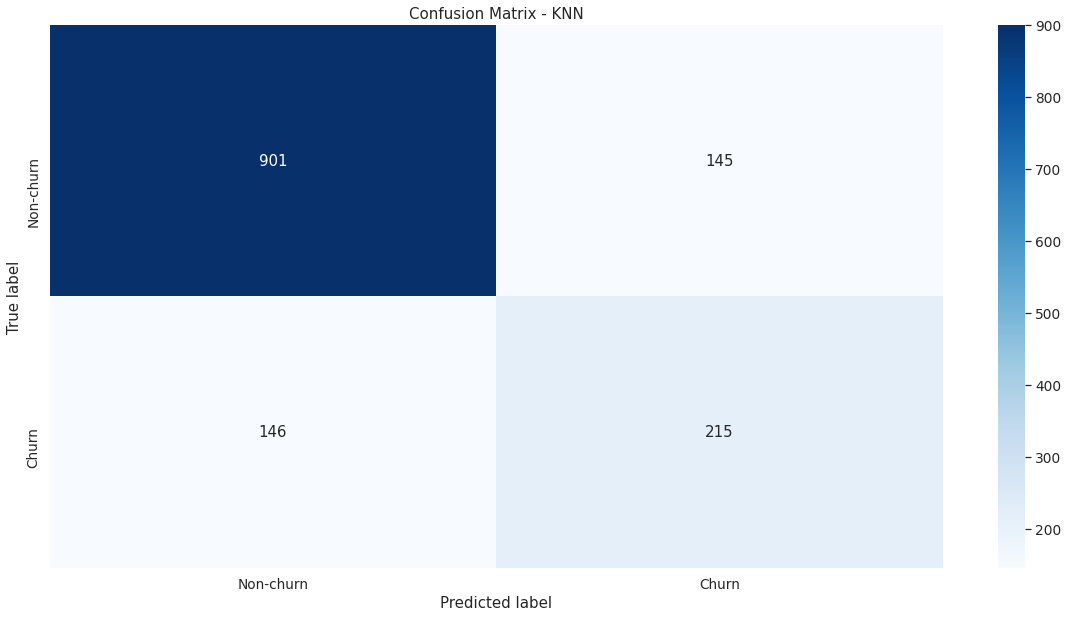

In [0]:
knn_pred = knn2.predict(X_test)
ConfMatrix_knn = confusion_matrix(y_test,knn_pred)
print()

plt.figure(figsize=(20,10))
sns.heatmap(ConfMatrix_knn,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-churn', 'Churn'], 
            yticklabels = ['Non-churn', 'Churn'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN")

In [0]:
# Number of errors
error = 0
for i, v in enumerate(knn2.predict(X_test)):
  if v != y_test.values[i]:
    error += 1
print(error)

291


The number of prediction errors is 291, which is smaller than that of decision tree(294).

#### Performance

In [0]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1046
           1       0.60      0.60      0.60       361

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



The f1 score of decision tree and KNN classifier is similar. Hence, the accuracy is almost the same. KNN has 79% accuracy, which is same as decision tree.

#### Plot the ROC curve

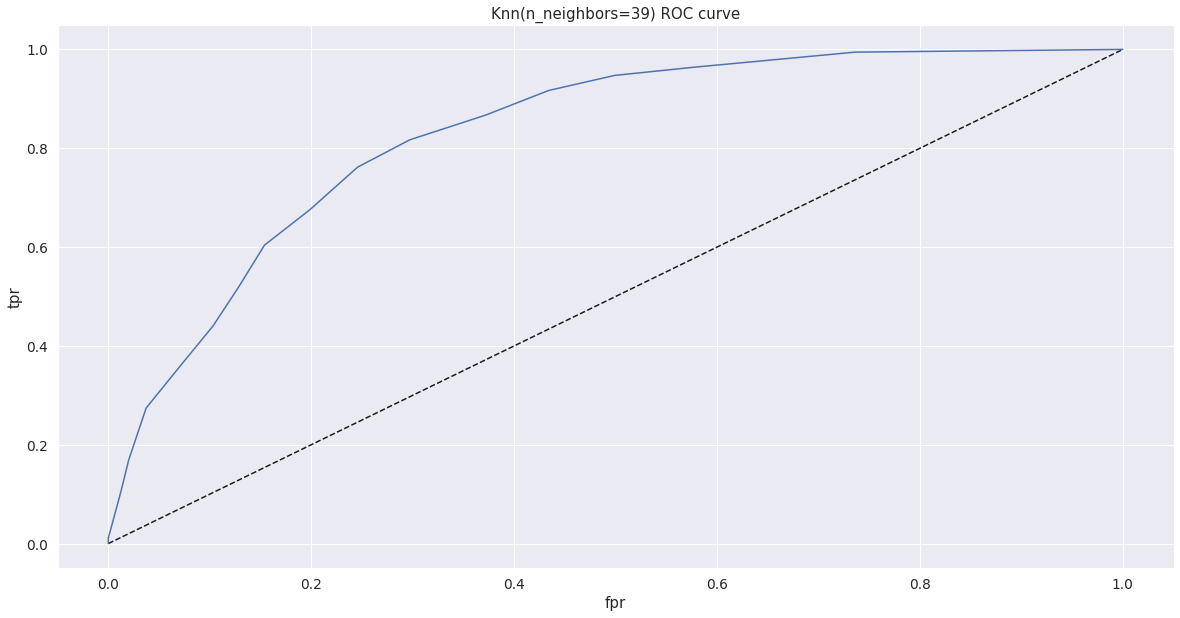

In [0]:
knn2 = KNeighborsClassifier(n_neighbors=18)
knn2.fit(X_train,y_train)

knn_auc = roc_auc_score(y_test, knn2.predict_proba(X_test)[:,1]).round(2)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn2.predict_proba(X_test)[:, 1])

plt.figure(figsize=(20,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(knn_fpr,knn_tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=39) ROC curve')
plt.show()

Score of ROC curve

In [0]:
roc_auc_score(y_test,knn2.predict_proba(X_test)[:,1])

0.831020958353416

The AUC score of KNN classifier is 83.1%




# **Part 5 - Random forest**

## Set up X and y

In [0]:
# Standardized the different columns (covert to same scale)
X = telco_df_dummies_clean[col_name]
scaler = preprocessing.StandardScaler().fit(X)

In [0]:
# Set X and y. 
X = pd.DataFrame(scaler.transform(X), columns = X.columns)
y = telco_df_dummies_clean['Churn_Yes']

# Train and test sets: 80% and 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
X

(5625, 26) (5625,)
(1407, 26) (1407,)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,1.009430,-1.009430,1.035617,-0.652305,-3.056334,-0.854336,1.382243,-0.886896,-0.633746,1.378330,-0.723918,-0.639260,-0.790186,-0.796849,0.902613,-0.514537,-0.561364,0.828939,-0.529976,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,-0.990658,0.990658,-0.965608,-0.652305,0.327189,-0.854336,1.382243,-0.886896,1.577918,-0.725516,1.381372,-0.639260,-0.790186,-0.796849,-1.107895,1.943495,-0.561364,-1.206361,-0.529976,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,-0.990658,0.990658,-0.965608,-0.652305,0.327189,-0.854336,1.382243,-0.886896,1.577918,1.378330,-0.723918,-0.639260,-0.790186,-0.796849,0.902613,-0.514537,-0.561364,0.828939,-0.529976,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,-0.990658,0.990658,-0.965608,-0.652305,-3.056334,-0.854336,1.382243,-0.886896,1.577918,-0.725516,1.381372,1.564308,-0.790186,-0.796849,-1.107895,1.943495,-0.561364,-1.206361,1.886879,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,1.009430,-1.009430,-0.965608,-0.652305,0.327189,-0.854336,-0.723462,1.127527,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.796849,0.902613,-0.514537,-0.561364,0.828939,-0.529976,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180,-0.990658,0.990658,1.035617,1.533025,0.327189,1.170500,1.382243,-0.886896,1.577918,-0.725516,1.381372,1.564308,1.265525,1.254943,-1.107895,1.943495,-0.561364,0.828939,-0.529976,-0.525351,-0.711863,1.839576
7028,-0.440327,1.612573,1.276493,2.241056,1.009430,-1.009430,1.035617,1.533025,0.327189,1.170500,-0.723462,1.127527,-0.633746,1.378330,1.381372,-0.639260,1.265525,1.254943,-1.107895,1.943495,-0.561364,0.828939,-0.529976,1.903490,-0.711863,-0.543604
7029,-0.440327,-0.872808,-1.170004,-0.854514,1.009430,-1.009430,1.035617,1.533025,-3.056334,-0.854336,1.382243,-0.886896,1.577918,-0.725516,-0.723918,-0.639260,-0.790186,-0.796849,0.902613,-0.514537,-0.561364,0.828939,-0.529976,-0.525351,1.404764,-0.543604
7030,2.271039,-1.158016,0.319168,-0.872095,-0.990658,0.990658,1.035617,-0.652305,0.327189,1.170500,-0.723462,1.127527,-0.633746,-0.725516,-0.723918,-0.639260,-0.790186,-0.796849,0.902613,-0.514537,-0.561364,0.828939,-0.529976,-0.525351,-0.711863,1.839576


## Random forest classifier development 

In [0]:
# Initialize random forest 
rf = RandomForestClassifier(random_state = 50, class_weight = 'balanced')

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

## Confirm the accuracy rate on the training data set

In [0]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_train, rf.predict(X_train))))

Random Forest Accuracy: 0.998


## Confirm the accuracy rate on the testing data set

In [0]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.795


We can see that random forest models the training data performs better than on the testing data, it is a phenomenon of overfitting.

So we will use the GridSearch and cross validation to avoid overfitting, while find the optimal hyperparameters as well.

We will try to define the range of possible values for some hyperparameters. 


## Use GridSearch with 5 folds cross validation to find the optimal hyperparameters

In [0]:
# Use GridSearch to identify the best hyperparameters for running random forest

time_1 = time.time()

parms = {'n_estimators': [100, 200, 500, 1000], 
         'max_depth': [5, 10, 20, 40],
         'min_samples_leaf': [1, 3, 5, 10], 
         'min_samples_split': [2, 4, 6]}

gs_rf = GridSearchCV(RandomForestClassifier(random_state = 50), 
                     param_grid = parms, scoring = 'accuracy', cv = StratifiedKFold(5))

gs_rf.fit(X_train, y_train)

time_2 = time.time()
total_time = time_2 - time_1

print(f'Best 5-folds CV accuracy: {gs_rf.best_score_ :.4f}.')

print('\nThe best hyperparameters:\n', gs_rf.best_params_)

print('\nTotal time: ', total_time)

Best 5-folds CV accuracy: 0.8014.

The best hyperparameters:
 {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500}

Total time:  1855.1036496162415


In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node.

We can see that the best hyperparameters are below.
-  max_depth: 10 (the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.)

- min_samples_leaf: 10 (the minimum number of samples required to split an internal node.)

- min_samples_split: 2 (the minimum number of samples required to split an internal node.)

- n_estimators: 500 (500 trees in the forest.)

## Build the final model 

In [0]:
# Initialize random forest 
rf_1 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, min_samples_split = 2, n_estimators = 500)

# Fit the model
rf_1.fit(X_train, y_train)

print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf_1.predict(X_test))))

Random Forest Accuracy: 0.813


This final model can be used to make predictions on new data.

## Feature importance

In [0]:
# Print the model's coefficient value, and make a ranking dataframe.  

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient'] = pd.Series(rf_1.feature_importances_)

coeff_df.sort_values(by = 'Coefficient', ascending = False).round(4)

,Features,Coefficient
1,tenure,0.1740
18,Contract_Month-to-month,0.1594
3,TotalCharges,0.1323
2,MonthlyCharges,0.1210
11,InternetService_Fiber optic,0.0925
24,PaymentMethod_Electronic check,0.0584
20,Contract_Two year,0.0505
19,Contract_One year,0.0211
21,PaperlessBilling_Yes,0.0208
12,OnlineSecurity_Yes,0.0196


(0.0, 0.18)

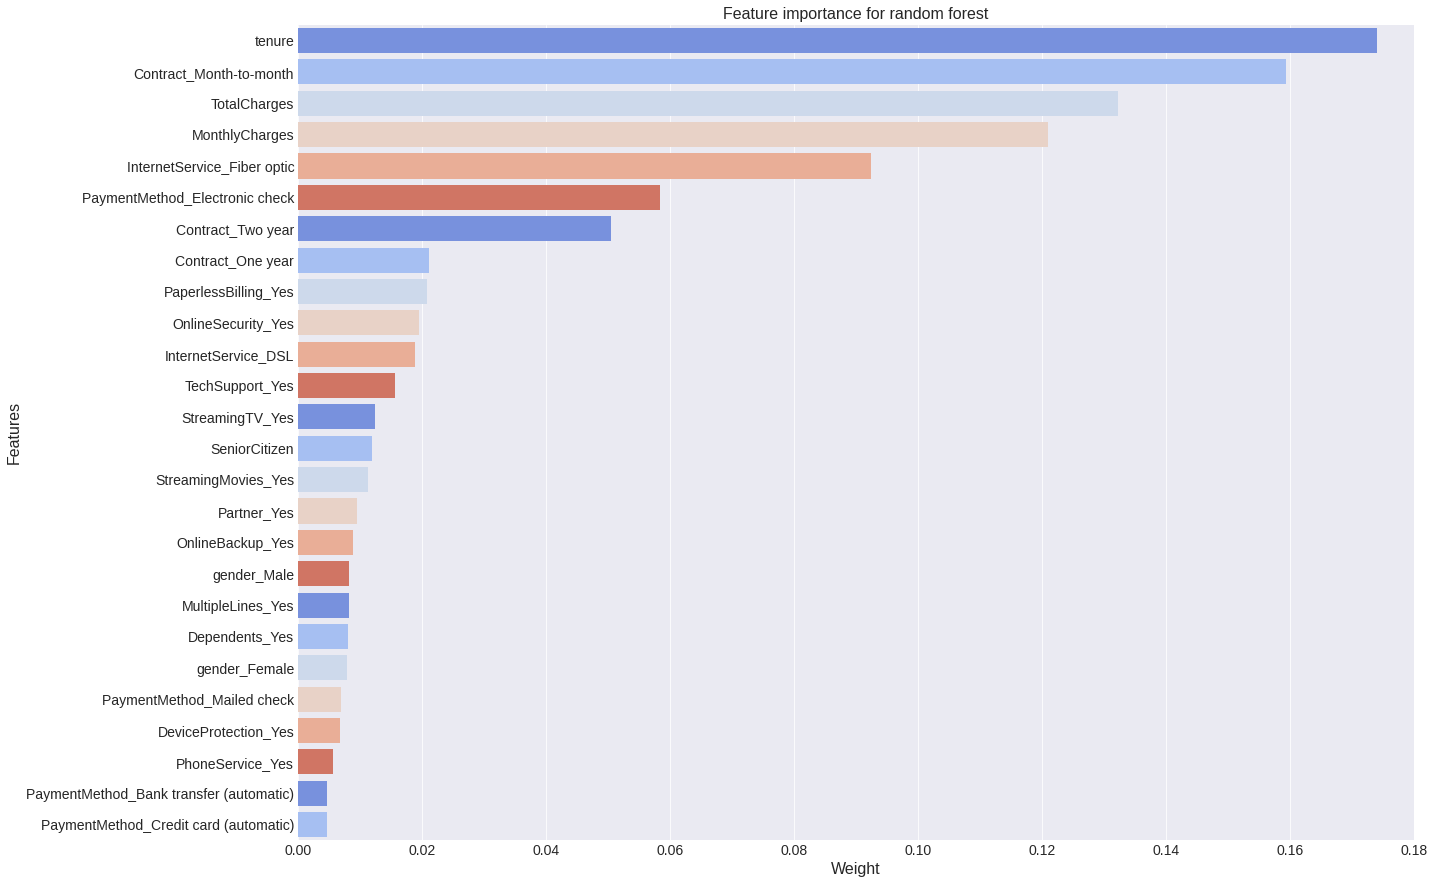

In [0]:
# Set figure size. 
rcParams['figure.figsize'] = (20, 15)

# Make barplot
ax = sns.barplot('Coefficient', 'Features', data = coeff_df.sort_values(by = 'Coefficient', ascending = False), capsize = 0.5, palette = sns.color_palette('coolwarm'), orient = 'h')

# Set x_label, y_label, plot title name.  
ax.set_xlabel('Weight', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.set_title('Feature importance for random forest', fontsize = 16)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)

# Set limit number for x axis.
plt.xlim(0, 0.18)

From random forest algorithm, we can see tenure, Contract_Month-to-month, TotalCharges, MonthlyCharges and InternetService_fiber optic are the top 5 most important predictors to churn.

## Assess the performance of random forest

Since we are dealing with imbalanced dataset, the accuracy rate is not the best metric to use.

So we want to look at the following performance measures that can give more insight into the accuracy of the model than traditional classification accuracy. 

- Confusion Matrix: a breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
- Precision: a measure of a classifiers exactness.
- Recall: a measure of a classifiers completeness
- F1 Score (or F-score): a weighted average of precision and recall.
- ROC Curves: like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.
- Partial dependence plot (PDP): shows how the predictions partially depend on values of the input variables of interest. 


## 1. Precision score, F1 score, and recall 

In [0]:
print(classification_report(y_test, rf_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1046
           1       0.66      0.57      0.61       361

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.81      0.81      1407



## 2. Confusion matrix

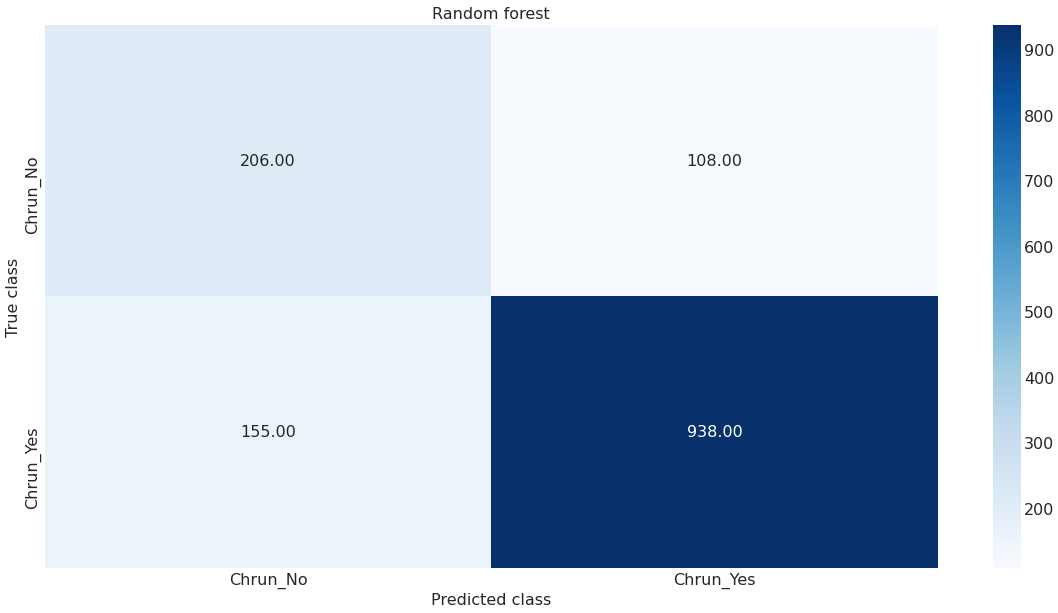

In [0]:
# Set the figure size. 
rcParams['figure.figsize'] = (20, 10)

# Compute confusion matrix.
y_pred = rf_1.predict(X_test)
rf_cm = confusion_matrix(y_pred, y_test, [1, 0])

# Make a heatmap.
ax = sns.heatmap(rf_cm, annot = True, fmt = '.2f', xticklabels = ['Chrun_No', 'Chrun_Yes'] , yticklabels = ['Chrun_No', 'Chrun_Yes'], cmap = 'Blues')
plt.ylabel('True class', fontsize = 16)
plt.xlabel('Predicted class', fontsize = 16)
plt.title('Random forest', fontsize = 16)

sns.set(font_scale = 1.25)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 16)
ax.tick_params(axis = 'x', labelsize = 16)

We can see there are 155 type 2 error (false negative), and 108 type 1 error (false positive) among 1,407 samples.

## 3. ROC curve

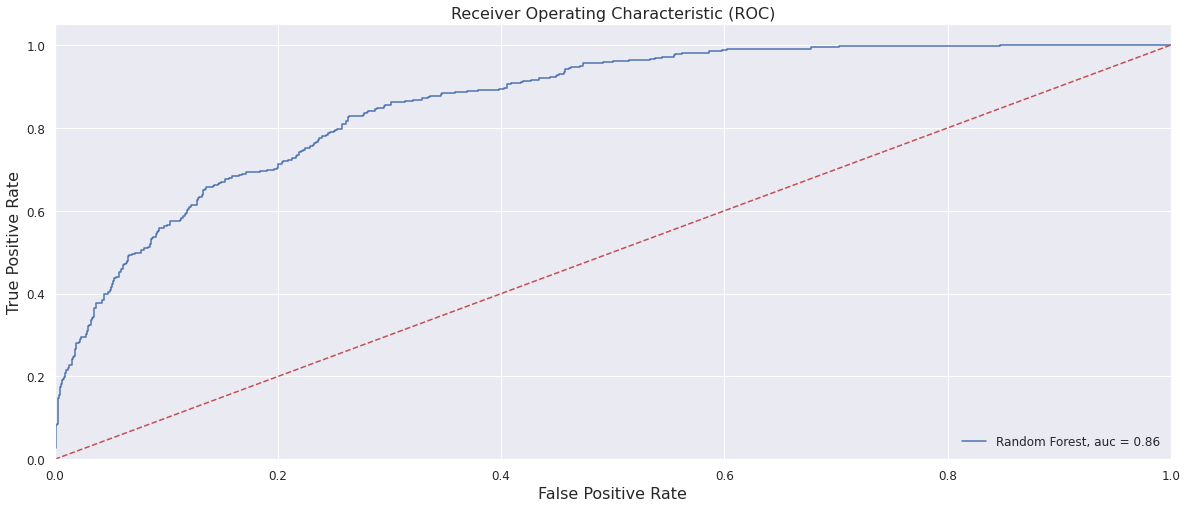

In [0]:
# Set the figure size. 
rcParams['figure.figsize'] = (20, 8)

# Compute ROC value. 
auc = roc_auc_score(y_test, rf_1.predict_proba(X_test)[:,1]).round(2)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_1.predict_proba(X_test)[:, 1])

# Visualization. 
plt.figure()
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest, auc = '+str(auc))
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic (ROC)', fontsize = 16)

plt.legend(loc = 'lower right', fontsize = 12)

plt.tick_params(labelsize = 12)

Here ROC curve shows the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test. 

AUC stands for area under the ROC curve from 0 to 1. 

Here, we can see our random forest prediction are 86% with correct, since the area under ROC curve is 0.86.

## 4. Particial dependece plot (PDP)

In [0]:
X = telco_df_dummies_clean[col_name]
scaler = preprocessing.StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns)
y = telco_df_dummies_clean['Churn_Yes']

# Train and test sets: 80% and 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

gb = ensemble.GradientBoostingRegressor(random_state = 1)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
feature_imp = gb.feature_importances_
indices = np.argsort(feature_imp)[::-1][:6]
col_names = [col_name[i] for i in indices]
for i in range(6):
  print("index is: " + str(indices[i]) + "; col name is: " + col_names[i])

index is: 18; col name is: Contract_Month-to-month
index is: 1; col name is: tenure
index is: 11; col name is: InternetService_Fiber optic
index is: 2; col name is: MonthlyCharges
index is: 3; col name is: TotalCharges
index is: 24; col name is: PaymentMethod_Electronic check


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dis

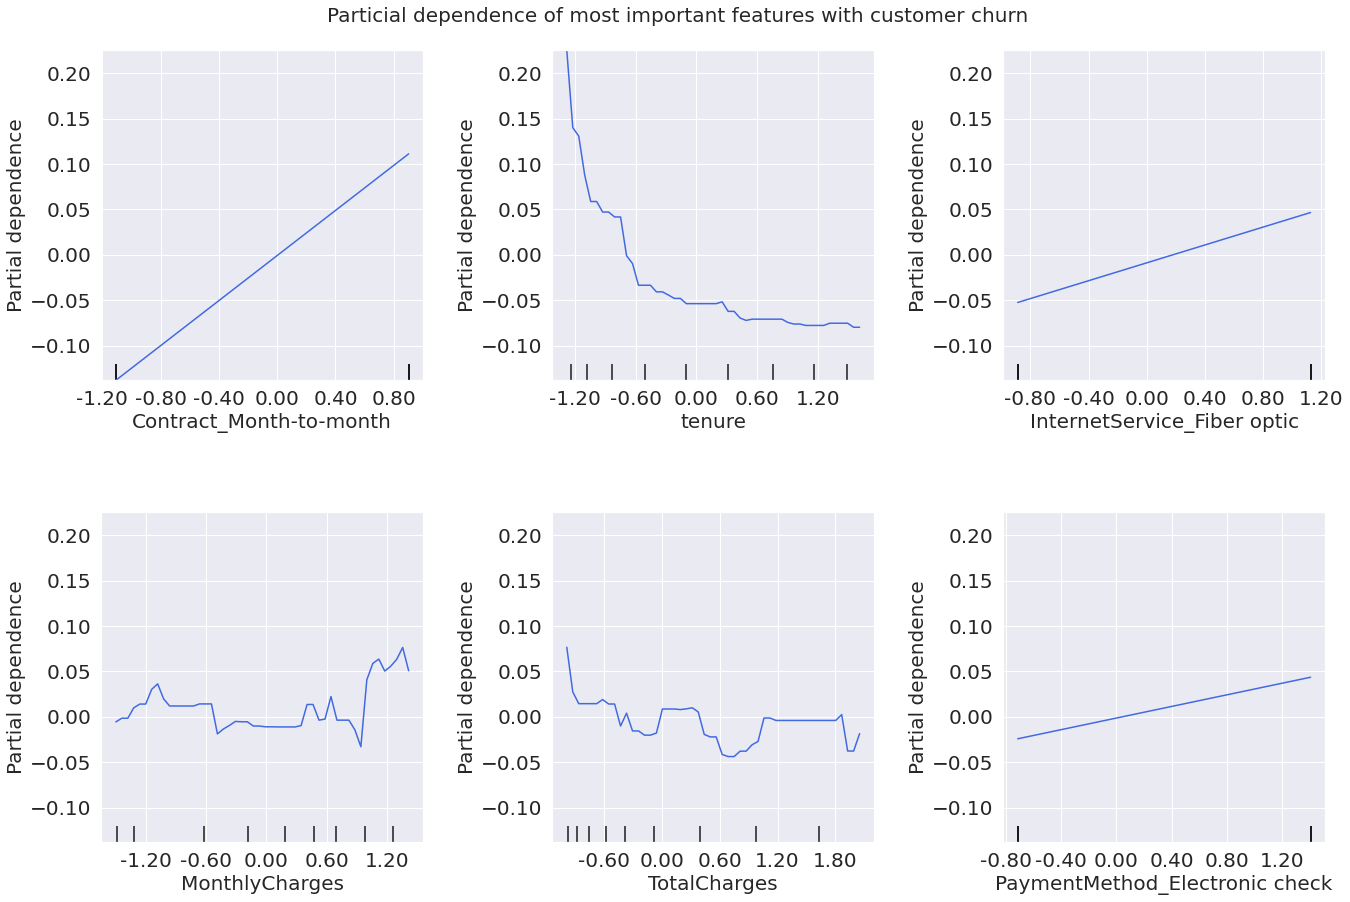

In [0]:
plot_names = ['Contract_Month-to-month', 'tenure', 'InternetService_Fiber optic', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod_Electronic check']
figs, axes = plot_partial_dependence(gb, X_train, feature_names = col_name, features = list(indices), grid_resolution = 50, line_kw = {'c': 'royalblue'})
figs = plt.gcf()
figs.subplots_adjust(wspace = 0.4, hspace = 0.4)
figs.set_figheight(20)
figs.set_figwidth(20)

figs.suptitle('Particial dependence of most important features with customer churn', fontsize = 20, x = 0.5, y = 0.73)

for ax in axes:
		for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
			item.set_fontsize(20)
		ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

Feature importance is useful for understanding what is driving our model, but it does not tell us how that feature is related to our predictions churn. So here I made the partial dependence plot to gain a deeper understanding of how the top 6 important features are driving the churn. 

From this plot, we can see the variable of Contract_Month-to-month, InternetService_DSL, and PaymentMethod_Electronic check have the strong positive linear relationship with churn. While the tenure has negative linear relationship against churn. 

# **Part 6 - Conclusion**

## Evaluate ROC performace on all models 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


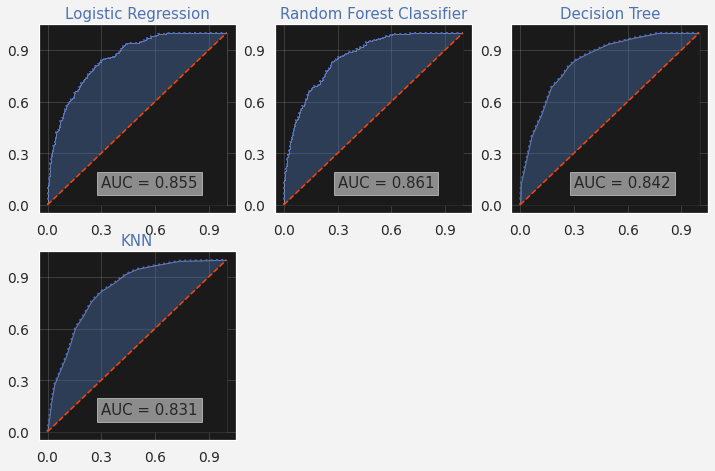

In [0]:
lst = [grid_clf_acc, rf_1, dtree_model2, knn2]

length = len(lst)

mods   = ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree', 'KNN']

fig = plt.figure(figsize=(12, 16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2)
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.text(0.3,0.1,"AUC = " + str(np.around(roc_auc_score(y_test,probabilities[:,1]),3)),bbox=dict(facecolor='white', alpha=0.5))
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

We can see the random forest classifier performs best with AUC 0.861, among all models we have used.

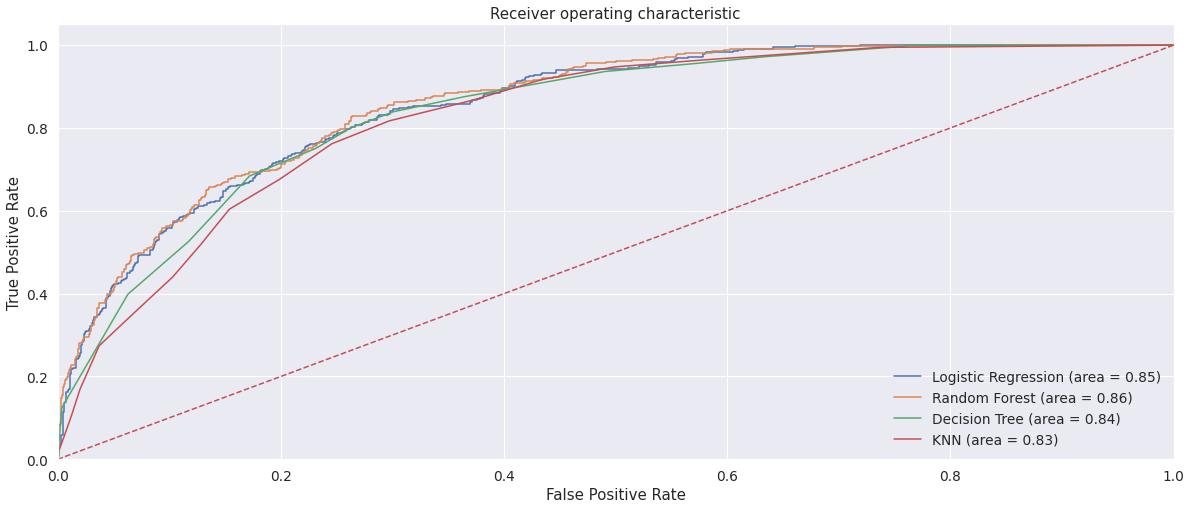

In [0]:
logit_roc_auc = roc_auc_score(y_test, grid_clf_acc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, grid_clf_acc.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf_1.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_1.predict_proba(X_test)[:,1])

dtree_roc_auc = roc_auc_score(y_test, dtree_model2.predict_proba(X_test)[:,1])
dtree_fpr, tdtree_tpr, thresholds = roc_curve(y_test, dtree_model2.predict_proba(X_test)[:,1])

knn_roc_auc = roc_auc_score(y_test, knn2.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn2.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dtree_fpr, tdtree_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

#### From the ourcome above, we can conclude that random forest is the best prediction model for customer churn in this data set. 

# **Part 7 - Additional analysis - Customer Life-time Value prediction**

We want to do the further analysis to predict the customer life-time value (predict the cost of false negative). The train data consists only customers who already left the Telco Company, since we can only know tenure value for customers who left the Telco. We added new column named 'life_time_value' ('tenure' * 'MonthlyCharges'). Noticed that we deleted 'Churn_Yes' and 'tenure' to build the model. We were deleting 'Churn_Yes' column in the dataset, since we need to use this dataset to predict any data (Churn_Yes = 0 or Churn_Yes = 1); however if we only use the data that 'Churn_Yes' equals to 1, the model won't be able to predict life-time value if the dataset also includes that 'Churn_Yes' equals to 0. We were deleting 'tenure', because when we want to predict new data through the model, we don't know the tenure for those customers who are staying with the company. The tenure for those customers is the time length staying with the company up to now, because they are not leaving the company.

## Clean data

In [0]:
# data clean up
colname = telco_df_dummies_clean.columns.to_list()
colname = [ x for x in colname if "No" not in x ]
telco_clean = telco_df_dummies_clean[colname]
# remove churn = 0, since we cannot know the accurate customer life-time value for those customers
new_telco_clean = telco_clean.loc[telco_clean['Churn_Yes'] == 1]

# add new column named 'life_time_value'
life_time_value = new_telco_clean['tenure'] * new_telco_clean['MonthlyCharges']
lst = life_time_value.to_list()
new_telco_clean["life_time_value"] = lst
new_telco_clean

# delet 'tenure' and 'Churn_Yes' features
final_telco_clean = new_telco_clean.drop(['tenure', 'Churn_Yes'], axis=1)
final_telco_clean.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,life_time_value
2,0,53.85,108.15,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,107.7
4,0,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,141.4
5,0,99.65,820.50,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,797.2


In [0]:
final_telco_clean['life_time_value'].dtype

dtype('float64')

## Model development

We were using three models to predict the life_time_value and we compared MSE (Mean Squared Error) to get the best performance model. The three models are:



*   Random Forest
*   Linear Regression (Ridge Regression & Lasso Regression)
*   Decision Tree



### Random Forest

In [0]:
# Set X and y. 
x = final_telco_clean.drop(['life_time_value'], axis=1)
y = final_telco_clean['life_time_value']

# Train and test sets: 80% and 20% 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Initialize random forest 
rf = RandomForestRegressor(random_state = 50)

# Fit the model
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

In [0]:
# Testing data MSE
y_pred = rf.predict(X_test)
MSE_random_forest = mean_squared_error(y_test, y_pred)
MSE_random_forest

3644.1201149973094

### Linear Regression

In [0]:
# Set X and y. 
x = final_telco_clean.drop(['life_time_value'], axis=1)
y = final_telco_clean['life_time_value']

# Train and test sets: 80% and 20% 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize linear model with L2
lr1 = Lasso(random_state = 0)

# Fit the model
lr1.fit(X_train, y_train)

#Get predictions for the test set
y_pred = lr1.predict(X_test)


In [0]:
# Mean squared error regression loss
MSE_Lasso_Linear = mean_squared_error(y_test, y_pred)
MSE_Lasso_Linear

3393.541553338738

In [0]:
# Set X and y. 
x = final_telco_clean.drop(['life_time_value'], axis=1)
y = final_telco_clean['life_time_value']

# Train and test sets: 80% and 20% 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize linear model with L1
lr2 = Ridge(random_state = 0)

# Fit the model
lr2.fit(X_train, y_train)

#Get predictions for the test set
y_pred = lr2.predict(X_test)

In [0]:
# Mean squared error regression loss
MSE_Ridge_Linear = mean_squared_error(y_test, y_pred)
MSE_Ridge_Linear

3378.177900774081

### Decision Tree

In [0]:
DecisionTreeRegressor
# Set X and y. 
x = final_telco_clean.drop(['life_time_value'], axis=1)
y = final_telco_clean['life_time_value']

# Train and test sets: 80% and 20% 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Initialize linear model with L1
dt = DecisionTreeRegressor(random_state = 0)

# Fit the model
dt.fit(X_train, y_train)

#Get predictions for the test set
y_pred = dt.predict(X_test)

In [0]:
# Mean squared error regression loss
MSE_Decision_Tree = mean_squared_error(y_test, y_pred)
MSE_Decision_Tree 

7831.206143048126

## Conclusion

The final result shows that MSE for Ridge Regression is the lowest, which is 3378. Ridge Regression is the best model to predict customer life-time value.

In [0]:
MSE = [{'MSE_random_forest': MSE_random_forest, 'MSE_Lasso_Linear': MSE_Lasso_Linear, 'MSE_Ridge_Linear':MSE_Ridge_Linear, 'MSE_Decision_Tree': MSE_Decision_Tree}] 
mse_df = pd.DataFrame(MSE, columns = ['MSE_random_forest', 'MSE_Lasso_Linear', 'MSE_Ridge_Linear', 'MSE_Decision_Tree']) 
mse_df

,MSE_random_forest,MSE_Lasso_Linear,MSE_Ridge_Linear,MSE_Decision_Tree
0,3644.120115,3393.541553,3378.177901,7831.206143


We also did the prediction by using our best model (Ridge Regression) and using the original dataset that only contains no churn. In this case, we can also do the further analysis for the future prediction with new data.

In [0]:
telco_clean_stay = telco_clean.loc[telco_clean['Churn_Yes'] == 0]

# delet 'tenure' and 'Churn_Yes' features
telco_clean_stay = telco_clean_stay.drop(['tenure', 'Churn_Yes'], axis=1)
telco_clean_stay.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1,0,56.95,1889.50,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,0,42.30,1840.75,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0


In [0]:
# predict the customer life time value for customers who are staying with the company (from oringinal data)
prediction_df = pd.DataFrame(lr2.predict(telco_clean_stay), columns = {'Prediction'}).set_index([pd.Index(telco_clean_stay.index)])
all_together_df = telco_clean_stay.join(prediction_df)
all_together_df.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Prediction
0,0,29.85,29.85,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,31.845009
1,0,56.95,1889.50,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1888.325994
3,0,42.30,1840.75,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1857.570722
6,0,89.10,1949.40,0,1,0,1,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1957.739712
7,0,29.75,301.90,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,303.819690
